**Wine Quality Red**

In [544]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [545]:
# connecting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [546]:
#Reading Dataset
redwine_df=pd.read_csv('/content/drive/MyDrive/Wine Quality/winequality-red.csv')
redwine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [547]:
#checking data info
redwine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [548]:
#Summmary of the dataset
redwine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [549]:
#Handling missing value
redwine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [550]:
#checking the shape of the data
redwine_df.shape

(1599, 12)

In [551]:
#checking duplicate records
duplicate=redwine_df.duplicated()
print(duplicate.sum())
redwine_df[duplicate]

240


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

In [552]:
#droppping duplicates from dataframe
redwine_df.drop_duplicates(inplace=True)

In [553]:
#Again checking shape
redwine_df.shape

(1359, 12)

In [554]:
#checking whether the duplicates have been removed from the dataset
duplicate=redwine_df.duplicated()
print(duplicate.sum())
redwine_df[duplicate]

0


Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

In [555]:
#Again check for duplicate records
dup=redwine_df.duplicated()
print(dup.sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
5       False
        ...  
1593    False
1594    False
1595    False
1597    False
1598    False
Length: 1359, dtype: bool>


**Data Visualization of Output variable (quality) column**

In [556]:
#checking number of classes for output variable Quality
print(redwine_df['quality'].value_counts())

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64


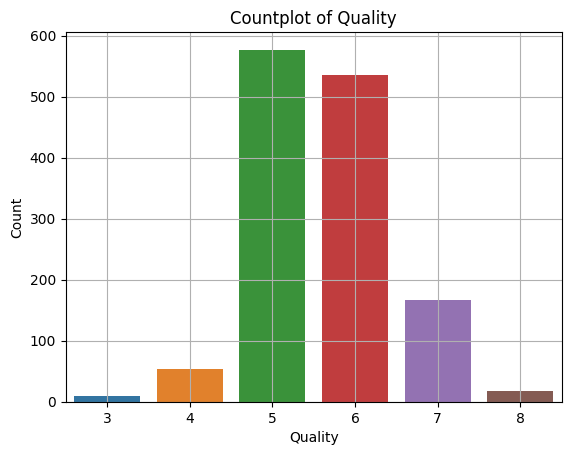

In [557]:
#Plotting the Quality column using countplot
sns.countplot(data=redwine_df, x='quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Countplot of Quality')
plt.grid()
plt.show()

**Correlation matrix**

<Axes: >

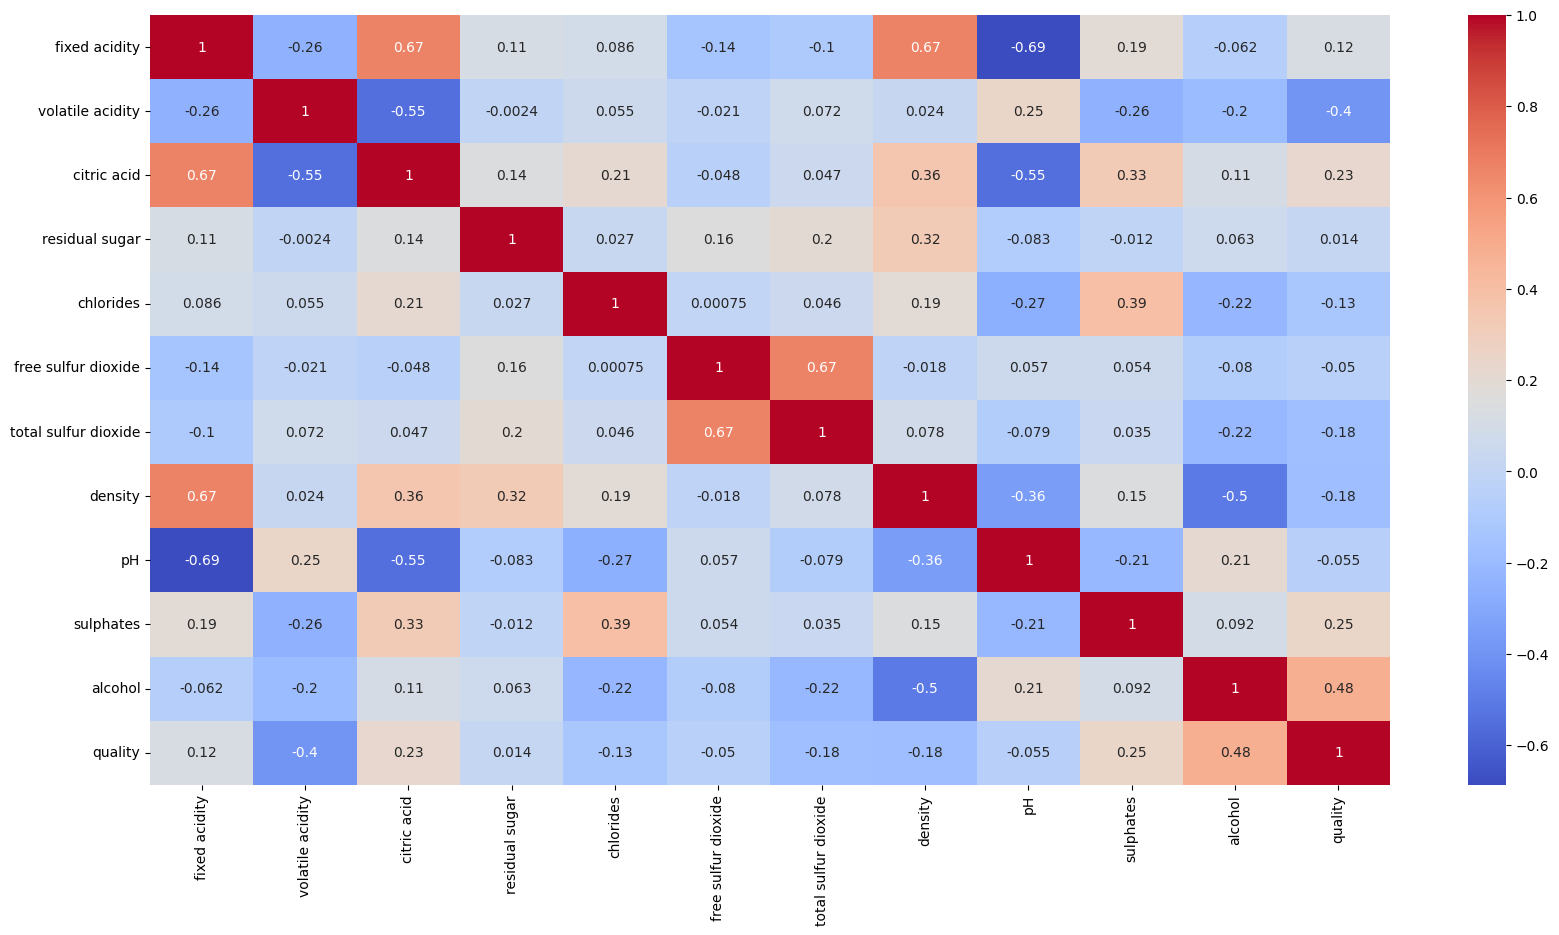

In [558]:
#Correlation matrix
corr=redwine_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

**Dividing the dataframe into dependent and independent variables**

In [559]:
#Input feature X
X=redwine_df.drop('quality',axis=1)
#Target feature y
y=redwine_df['quality']

In [560]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
5      9.4

In [561]:
X.shape

(1359, 11)

In [562]:
y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

In [563]:
y.shape

(1359,)

**EDA**

In [564]:
#Scatter Plot
#create function for plotting scatterplot between two columns of dataset
def plot_scatter(xin,yin):
  plt.figure()
  plt.xlabel(xin)
  plt.ylabel(yin)
  plt.scatter(redwine_df[xin],redwine_df[yin])

<ipython-input-564-27b0b33c912d>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


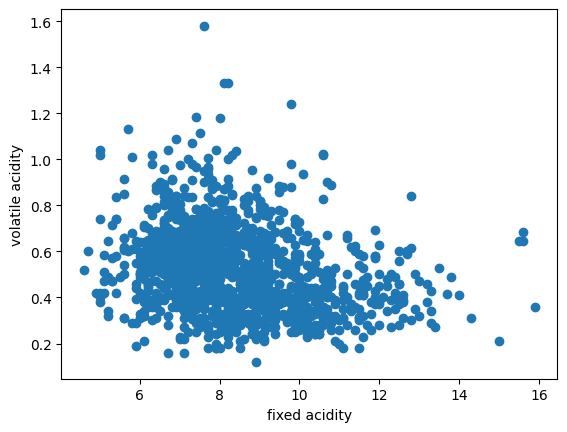

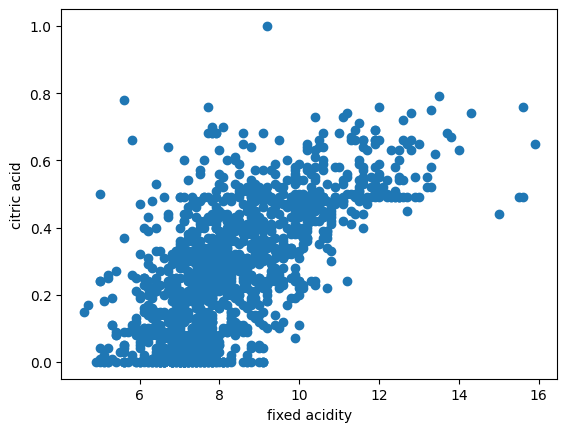

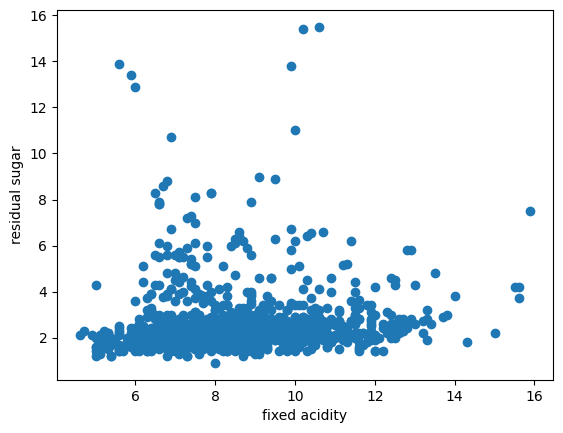

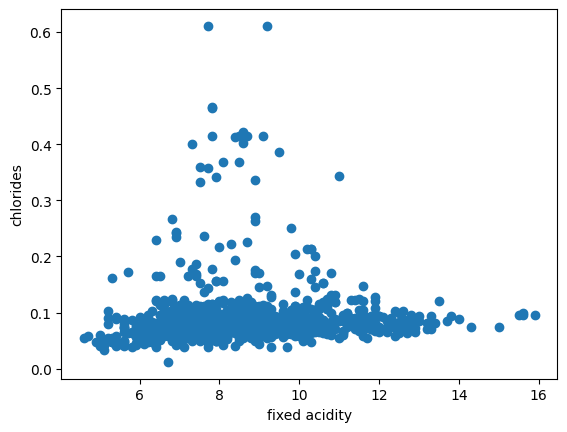

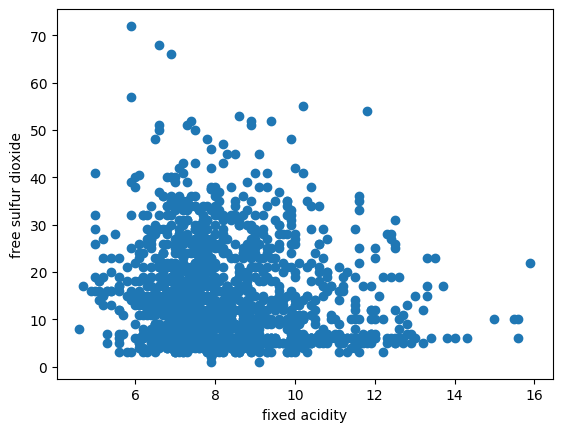

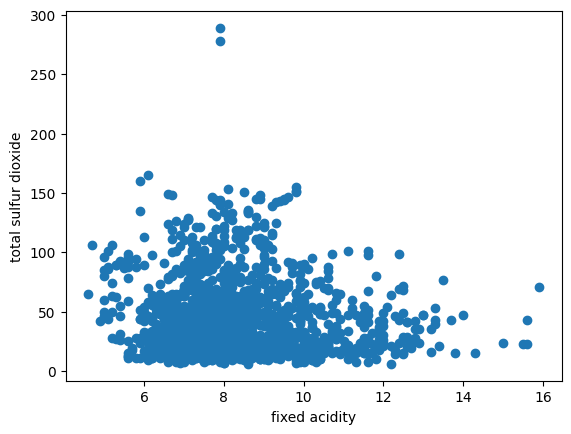

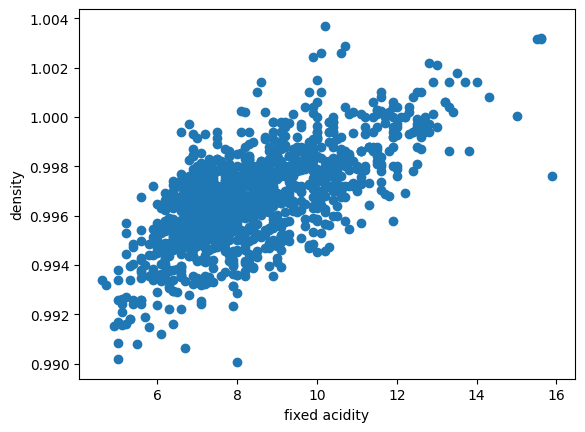

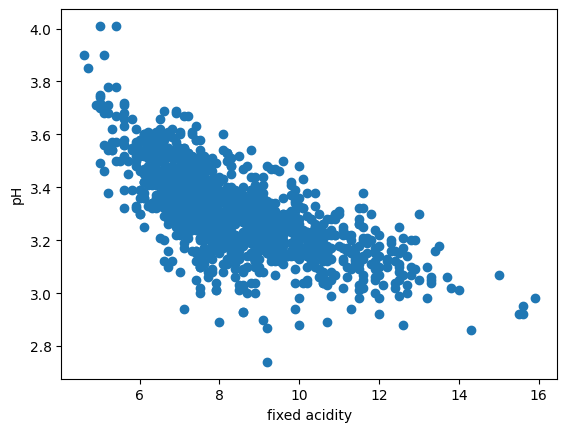

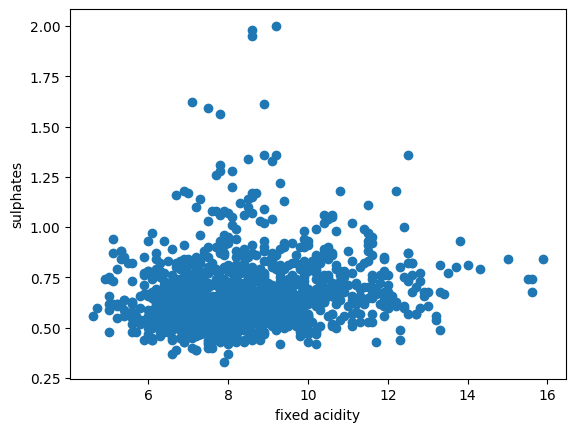

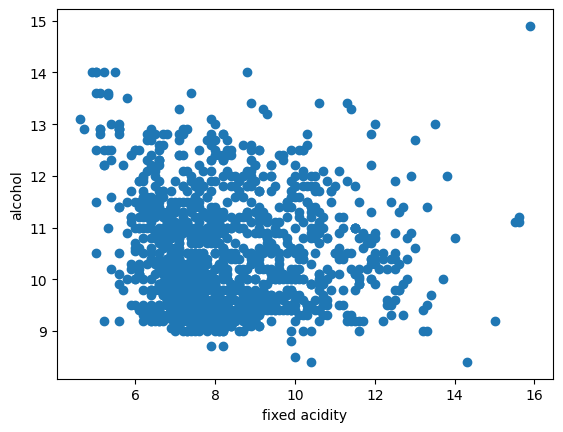

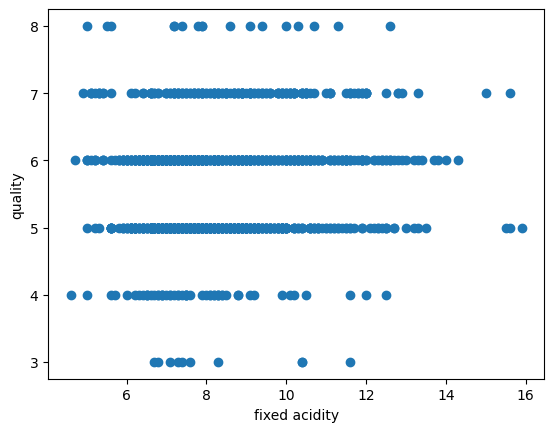

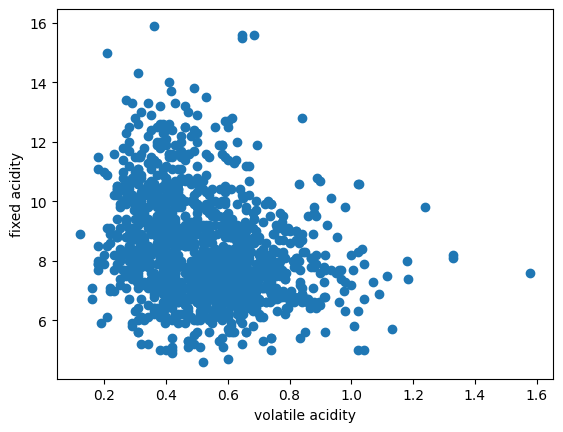

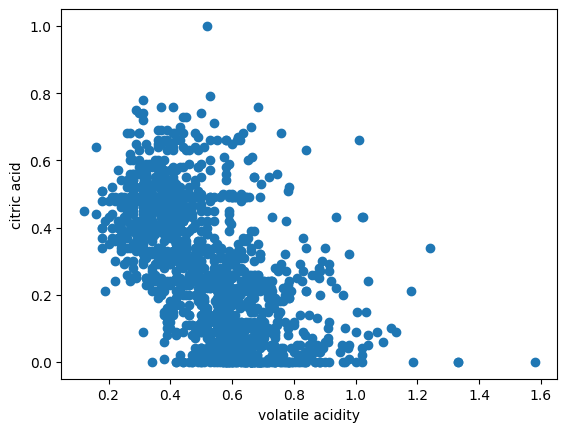

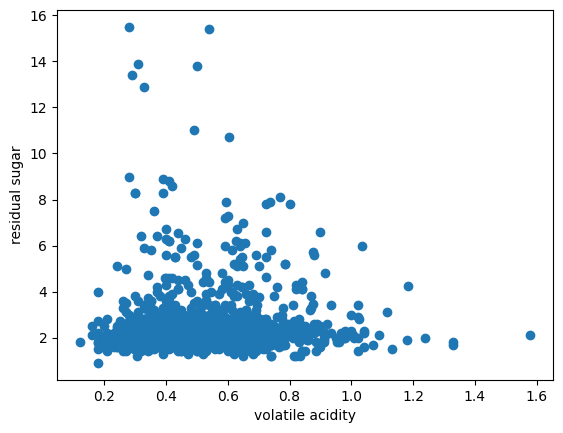

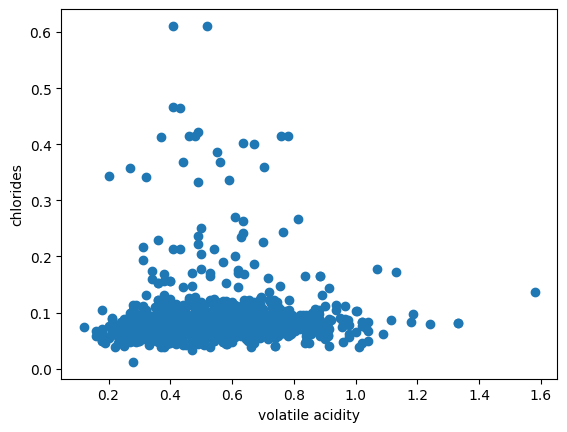

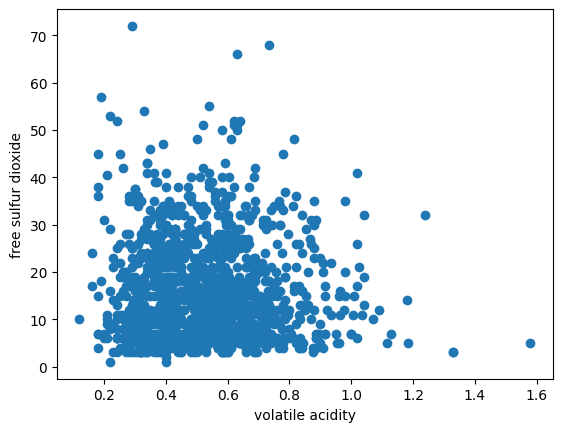

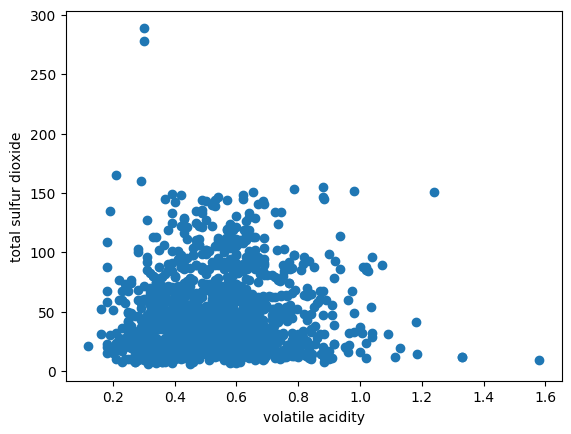

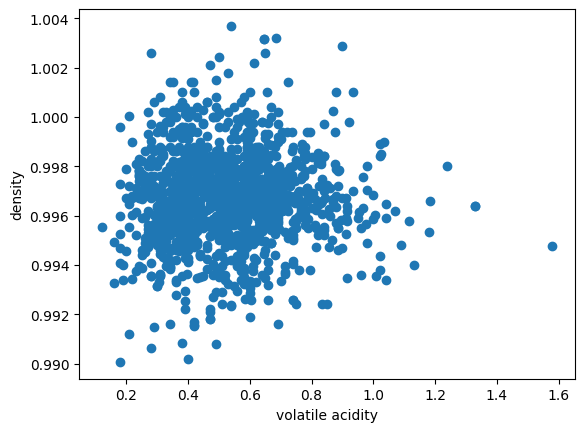

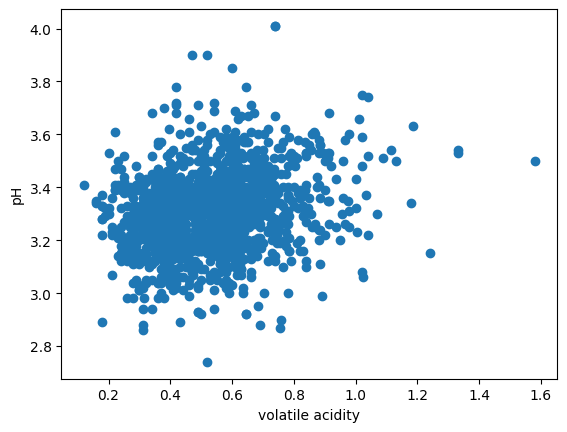

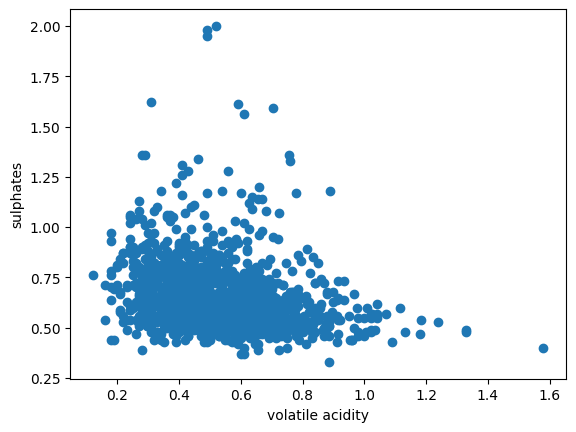

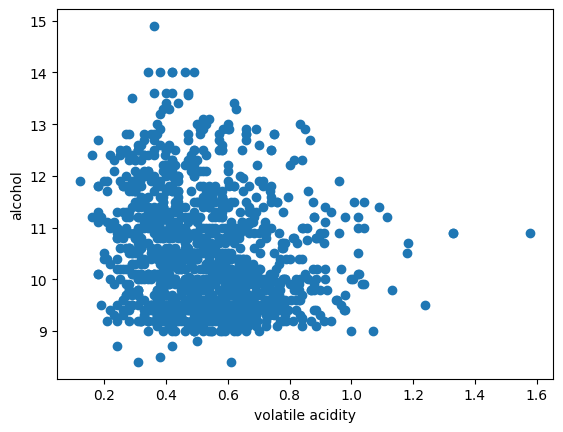

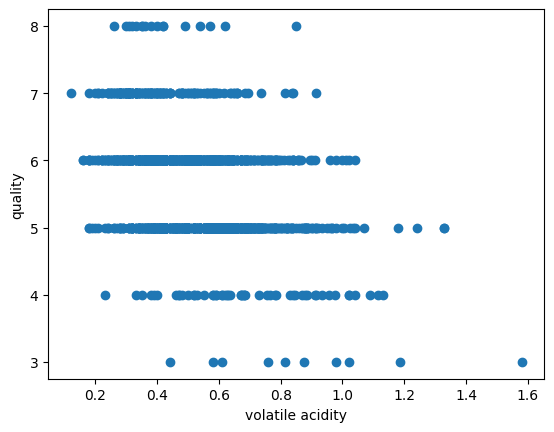

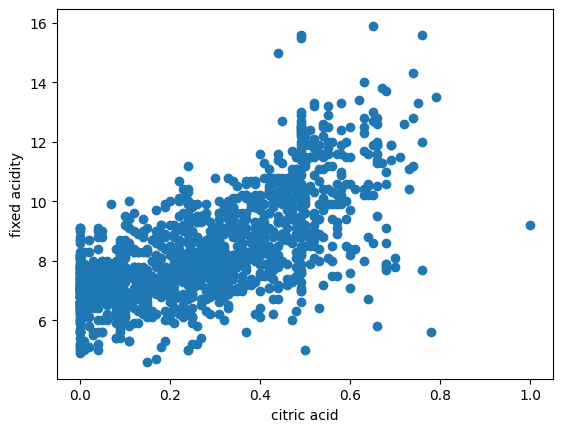

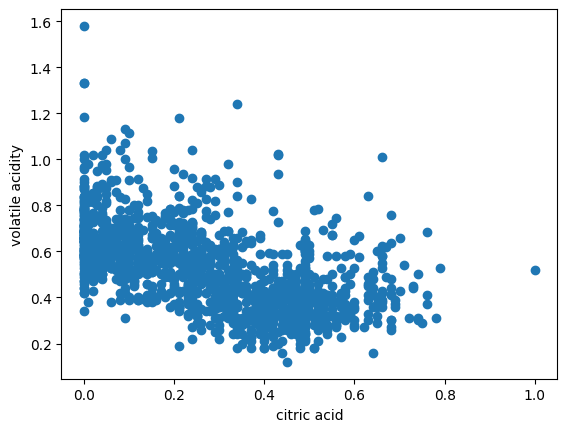

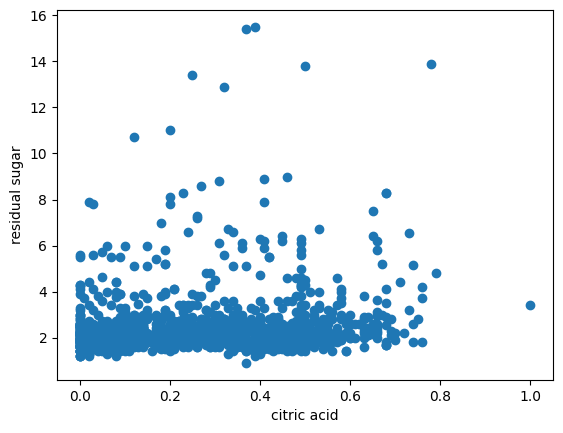

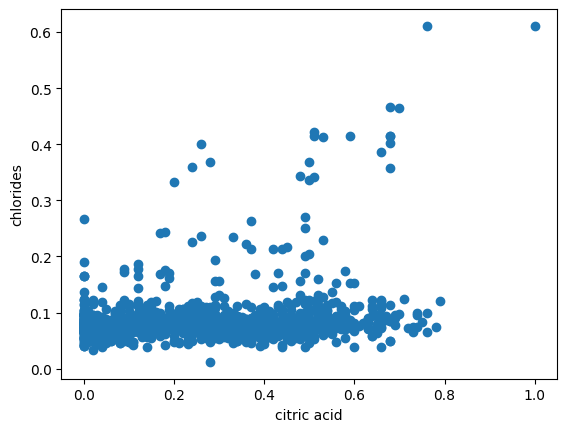

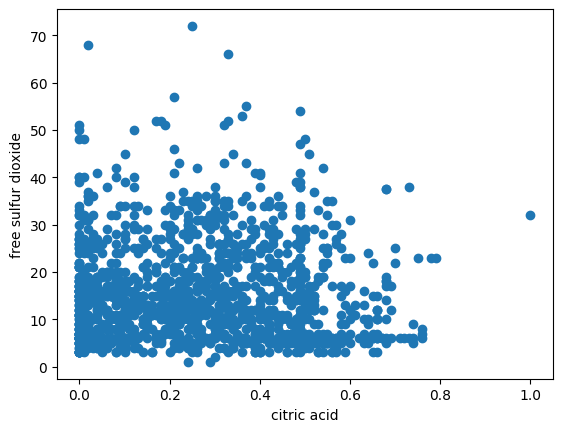

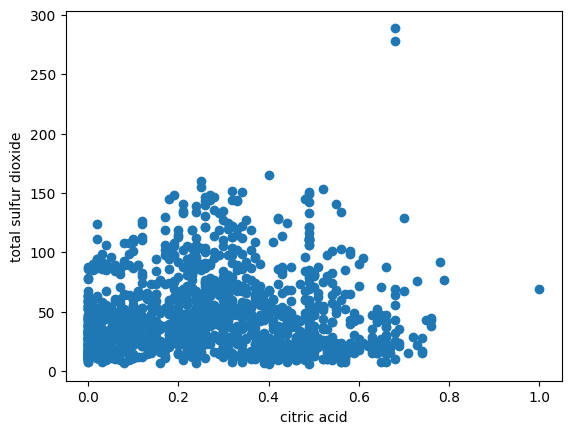

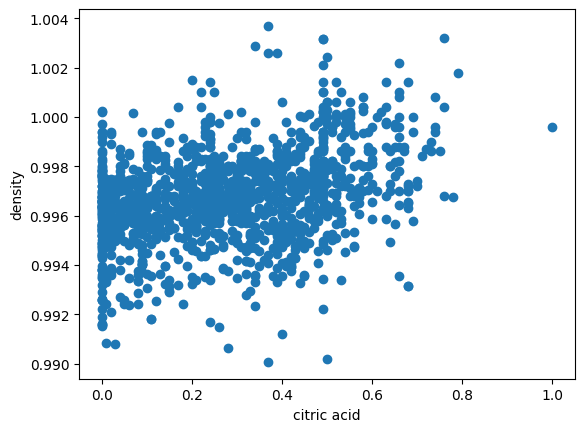

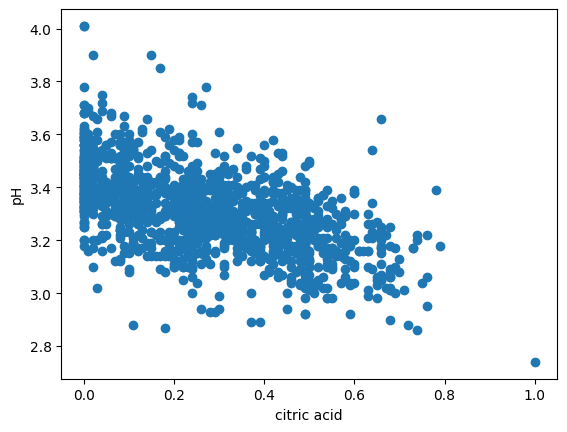

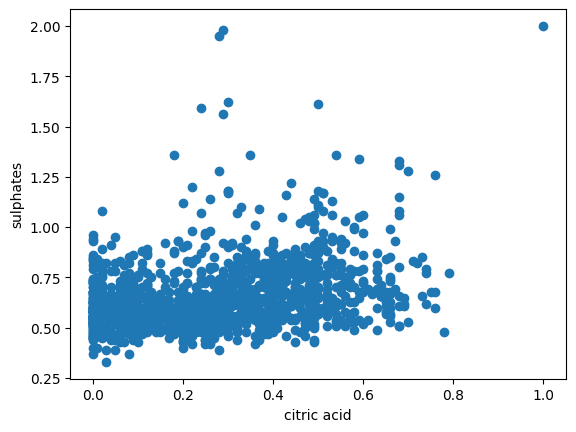

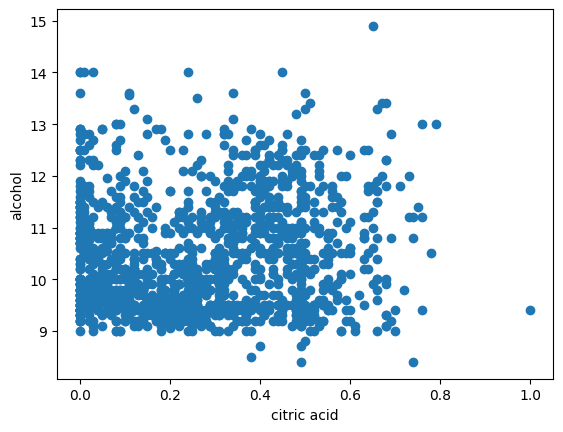

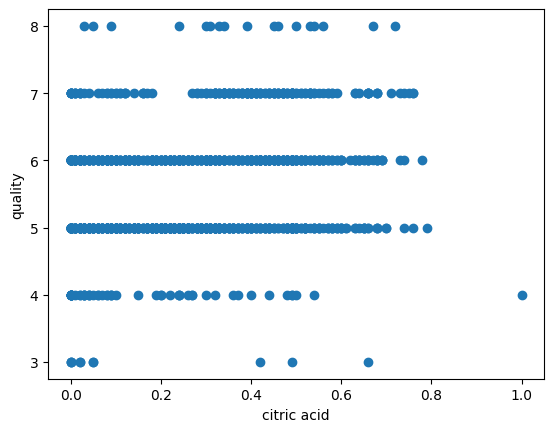

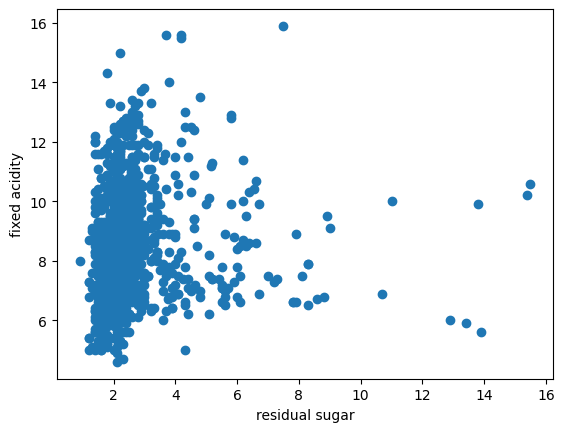

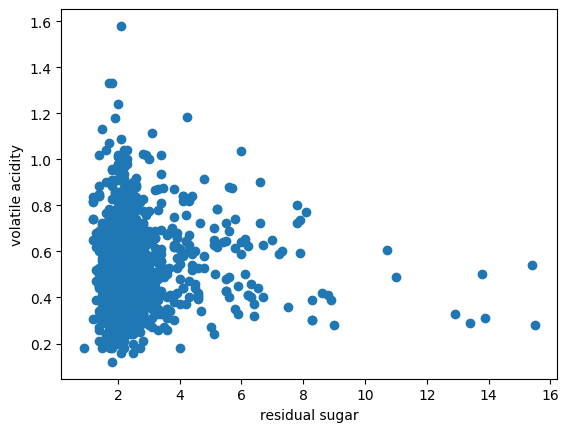

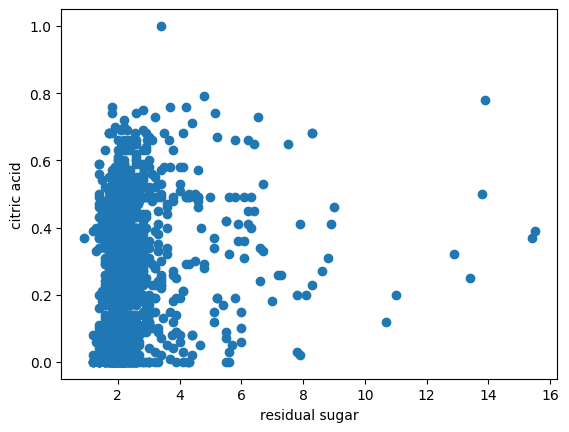

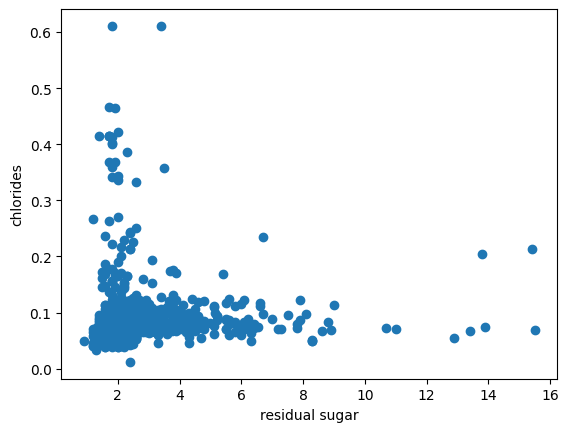

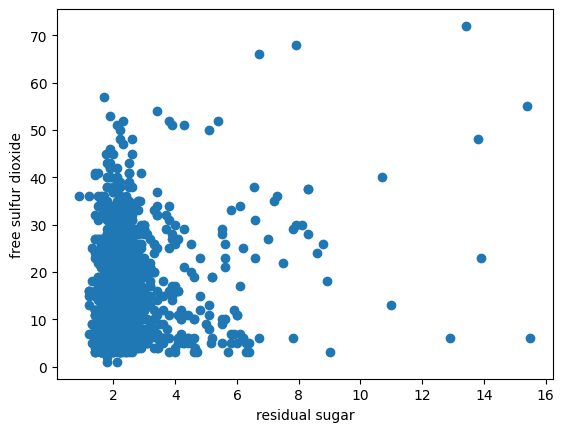

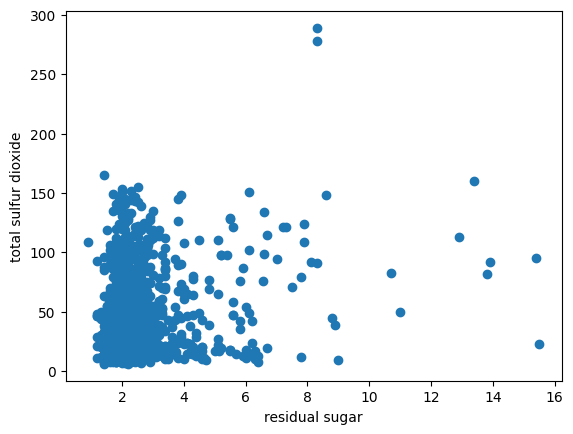

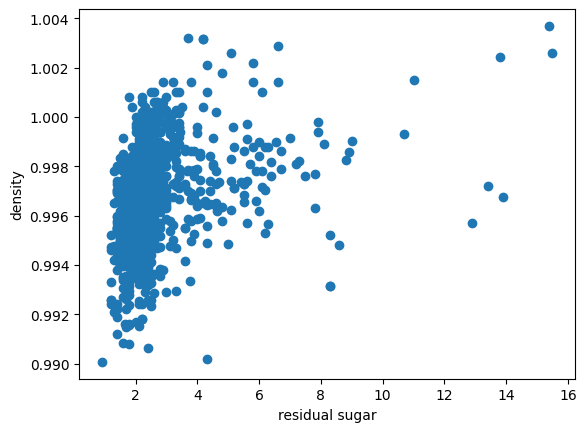

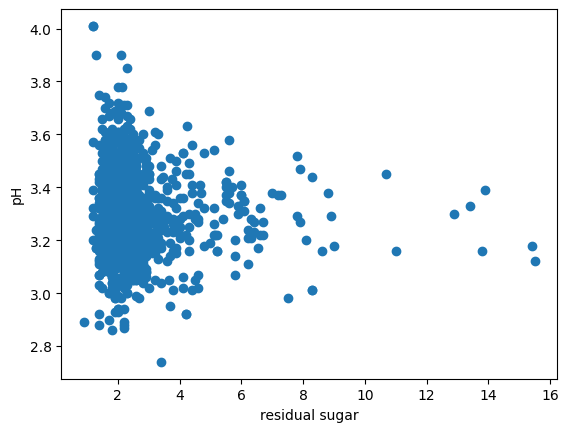

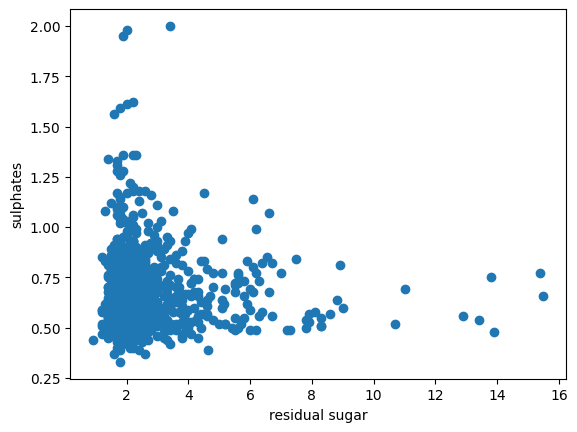

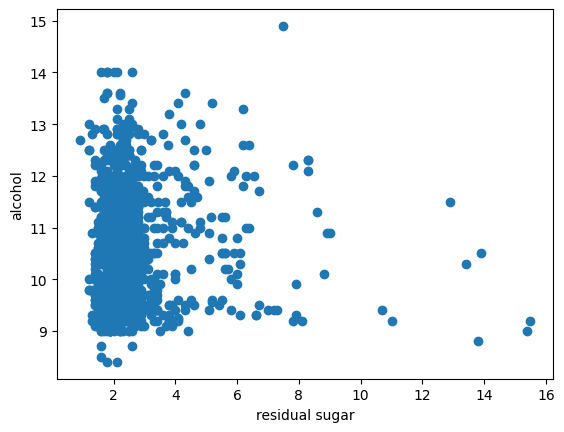

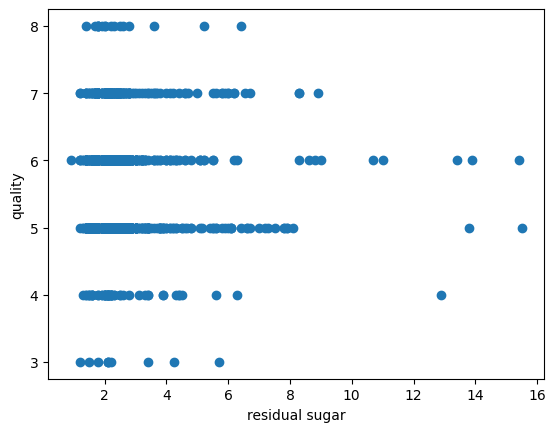

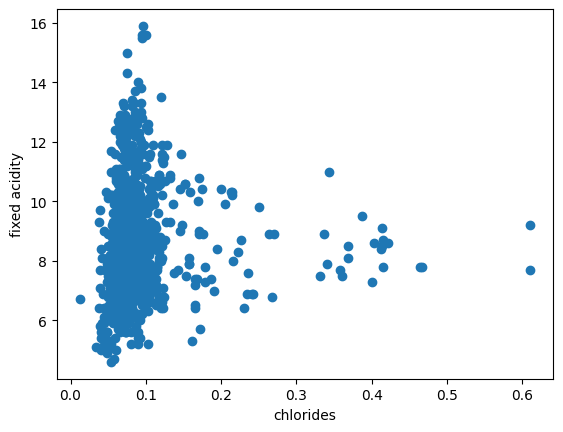

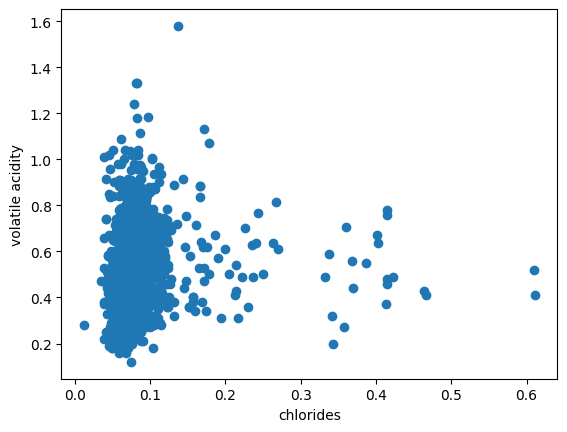

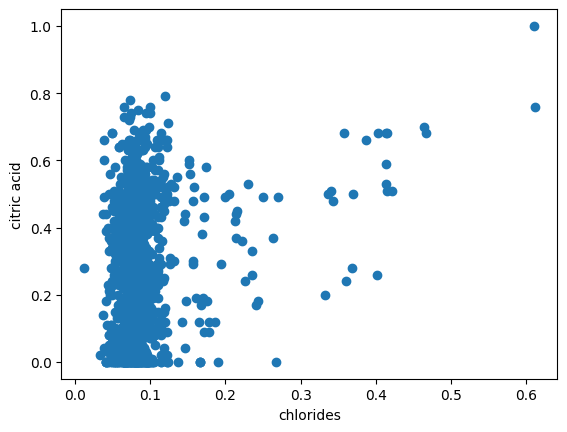

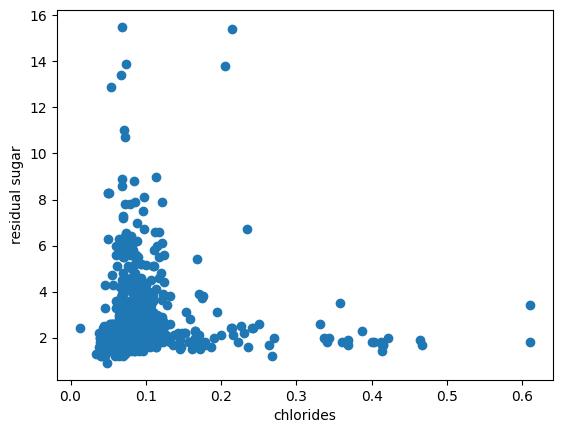

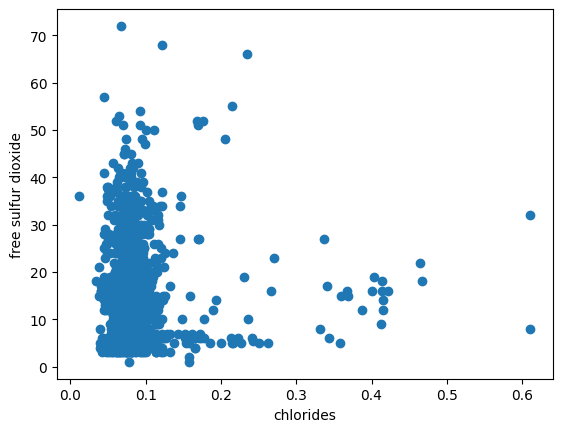

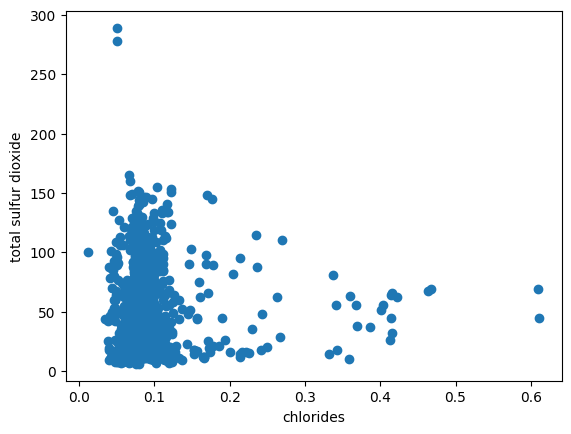

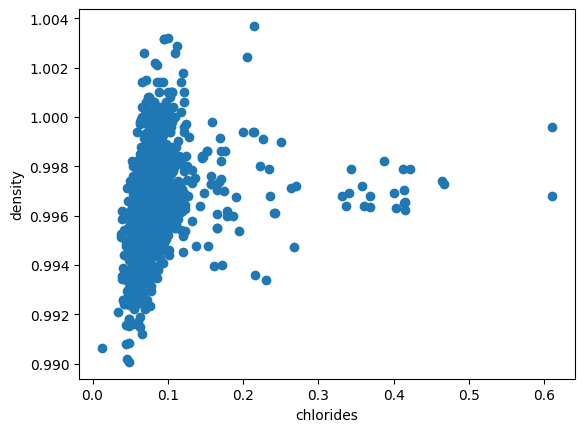

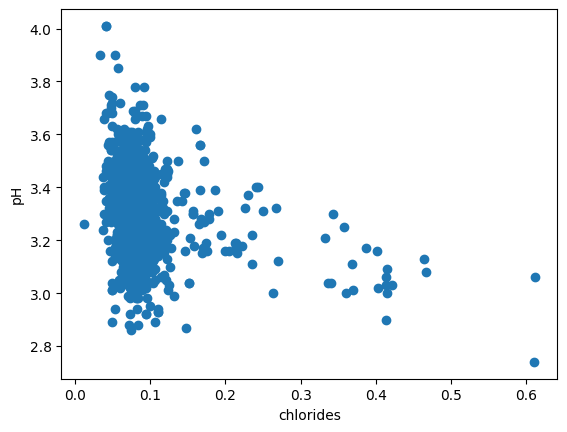

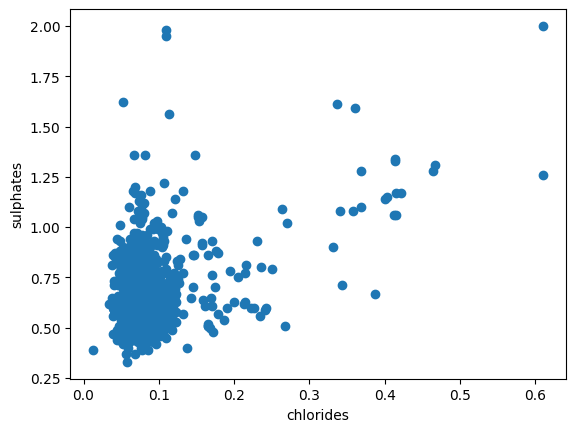

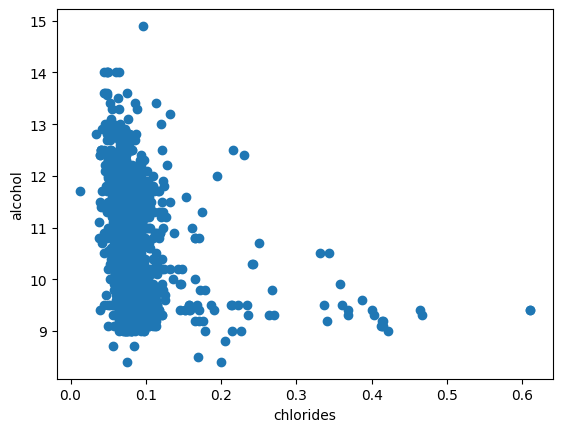

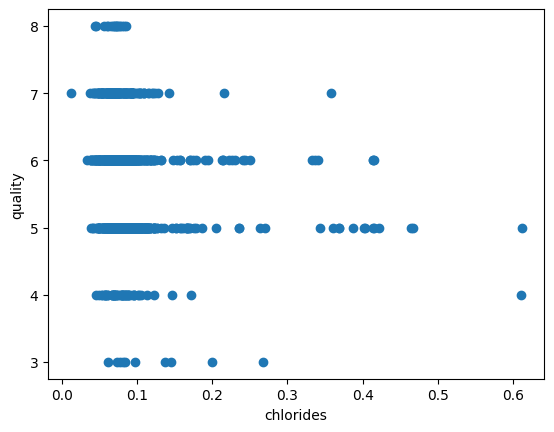

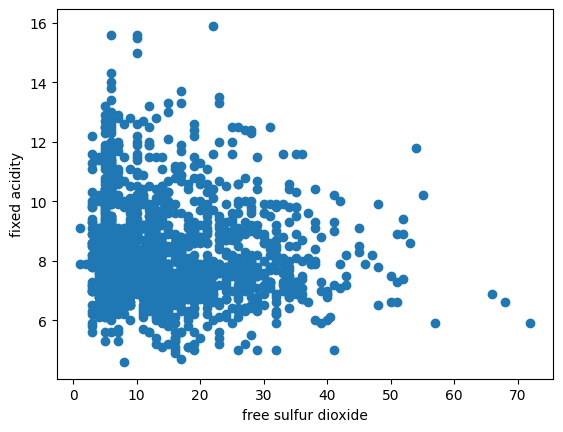

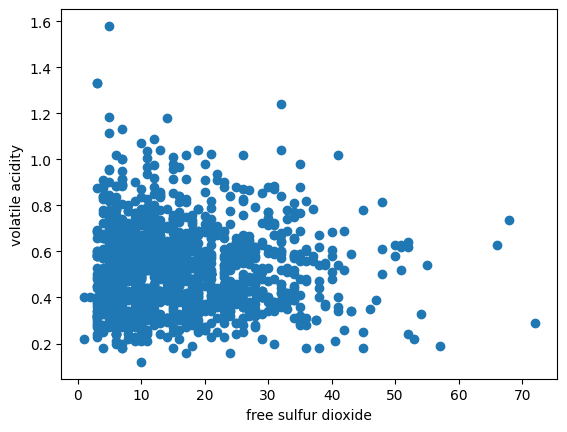

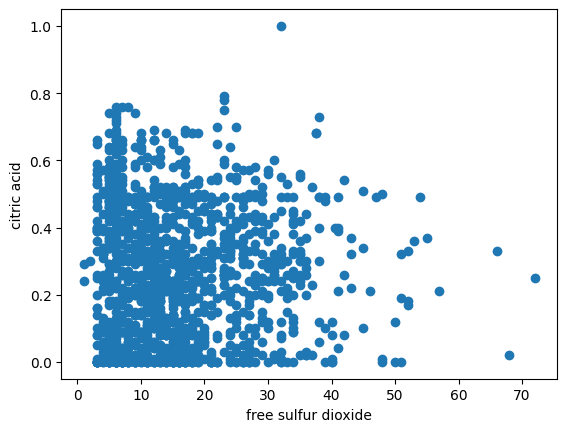

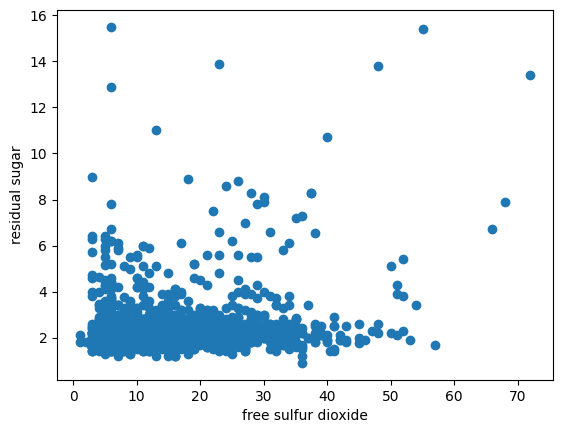

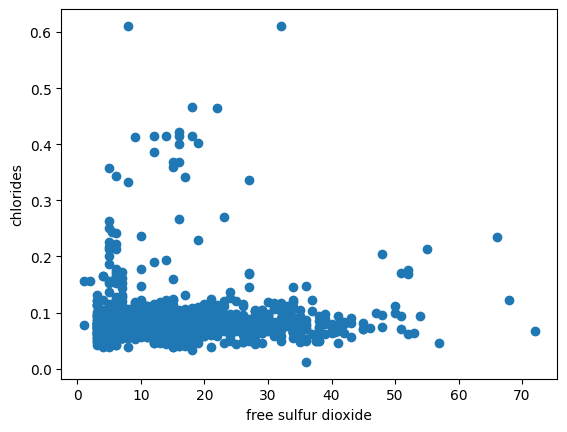

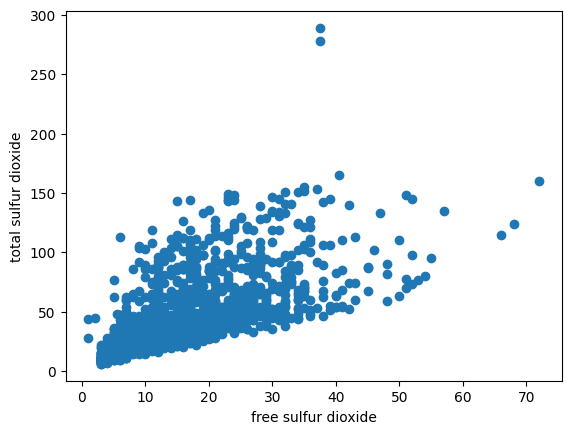

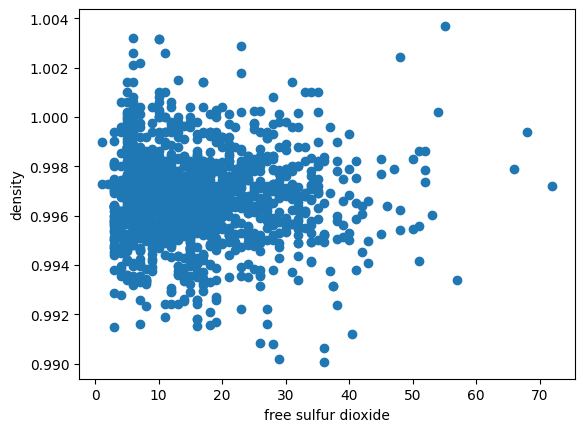

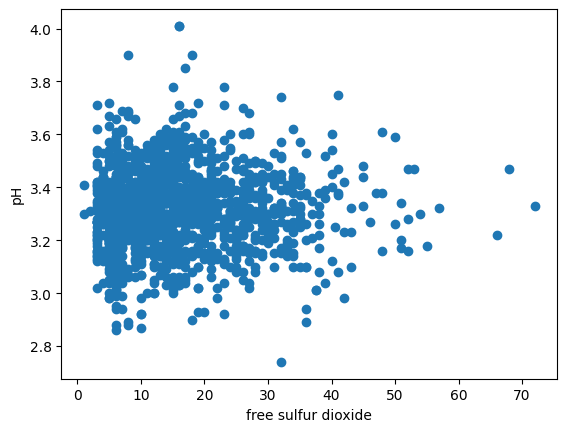

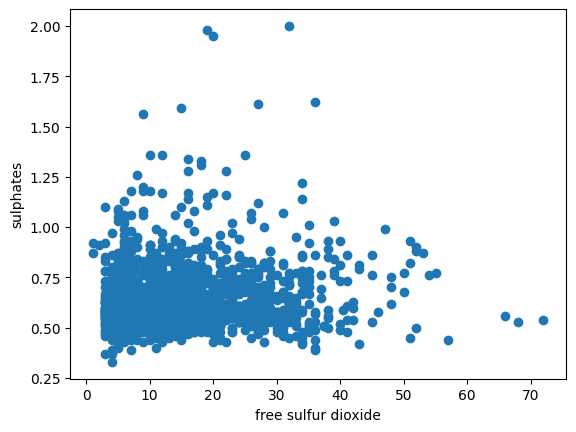

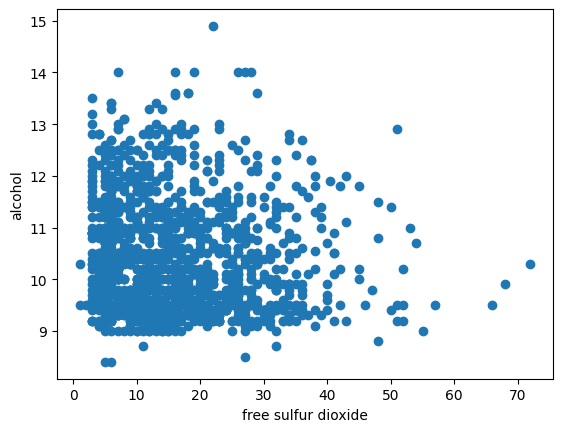

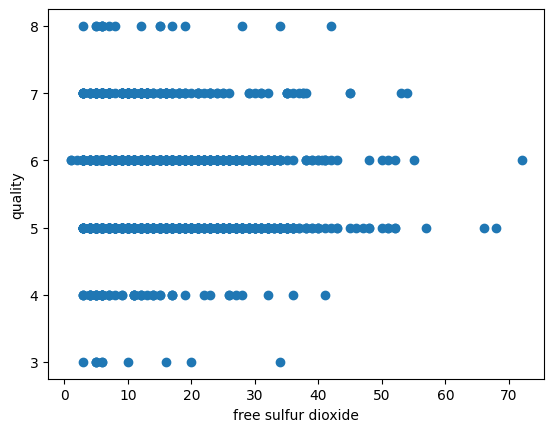

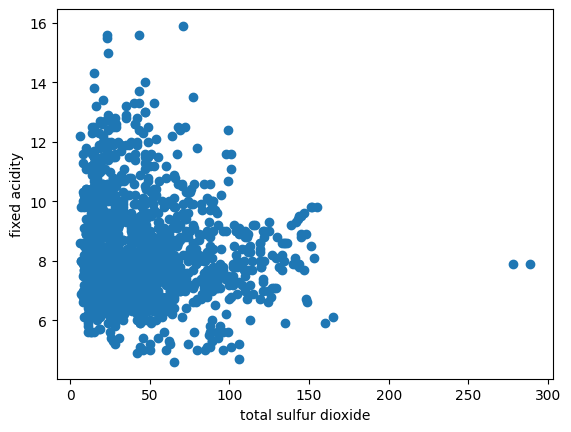

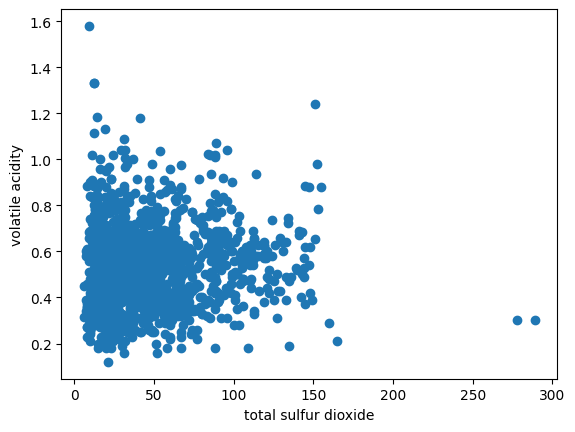

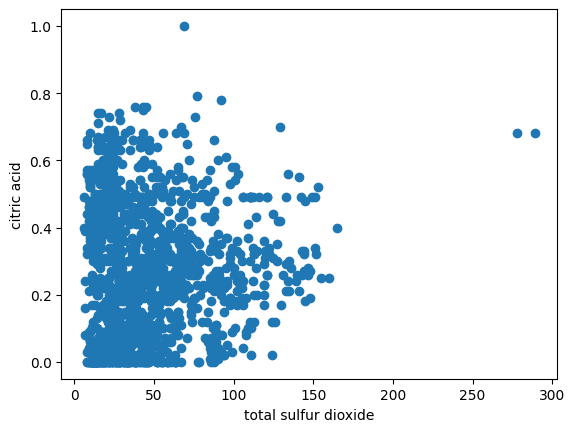

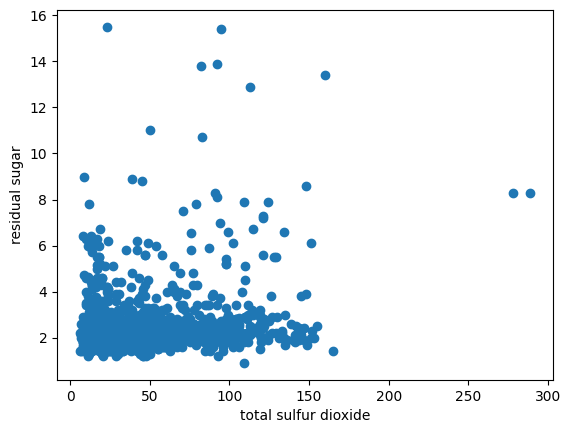

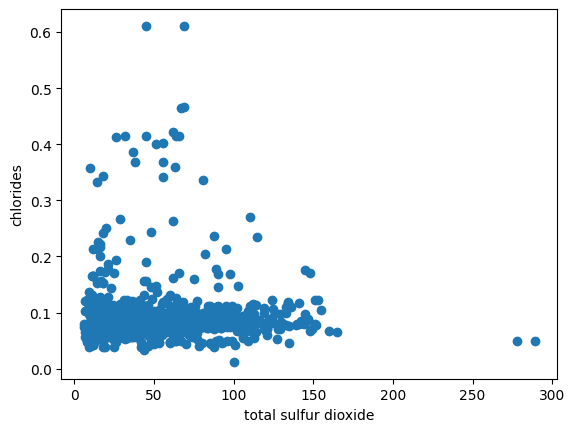

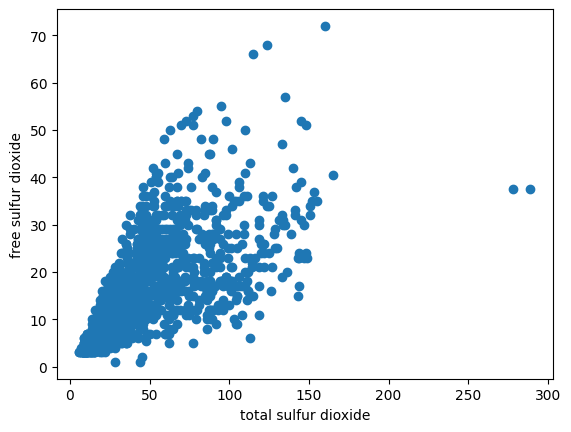

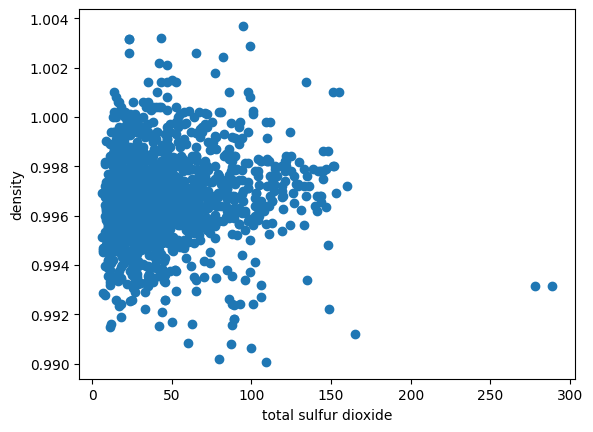

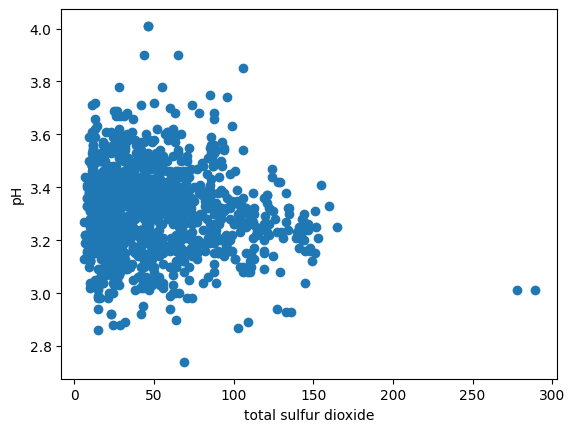

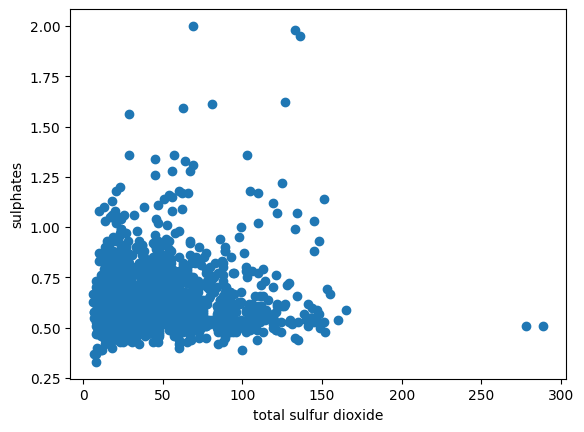

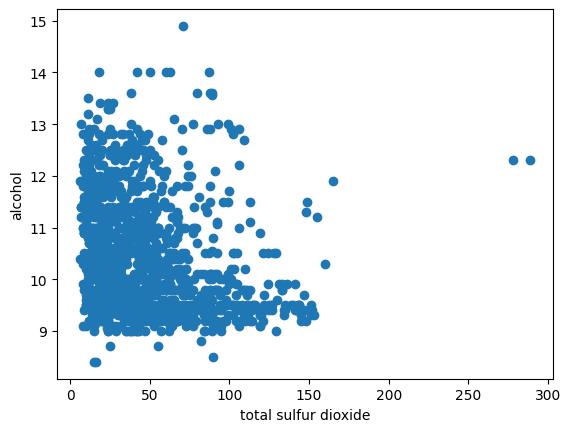

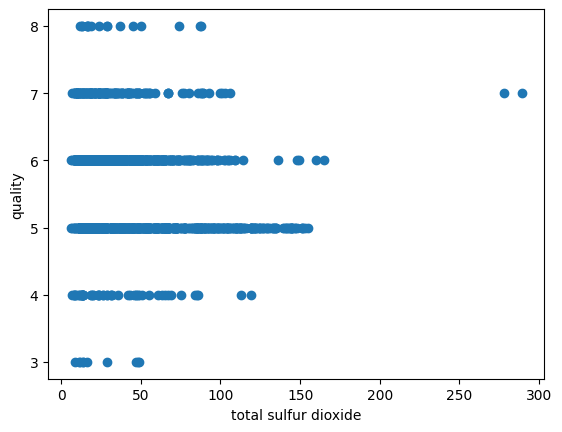

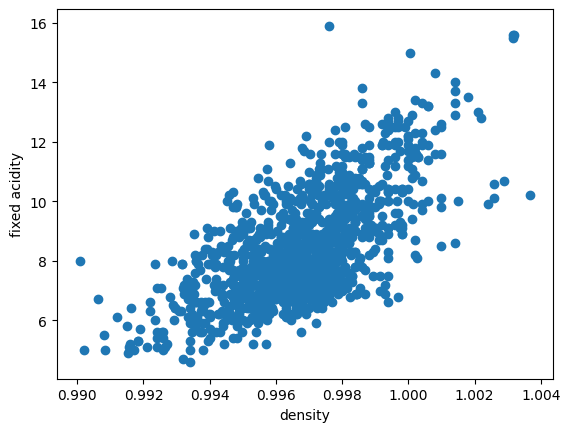

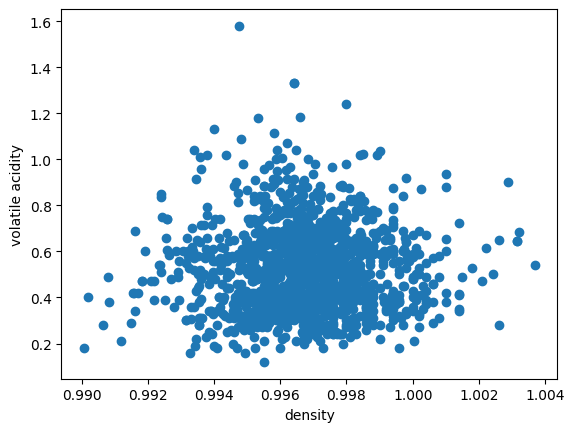

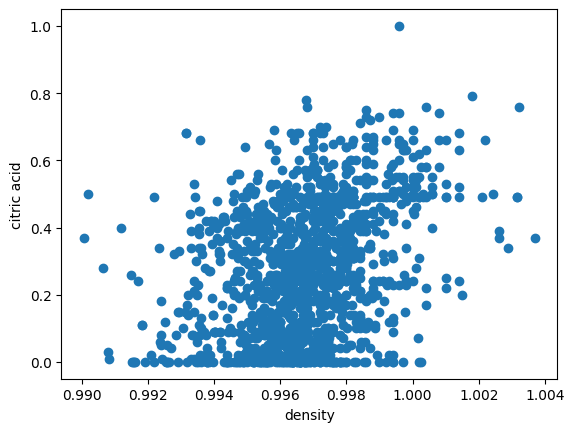

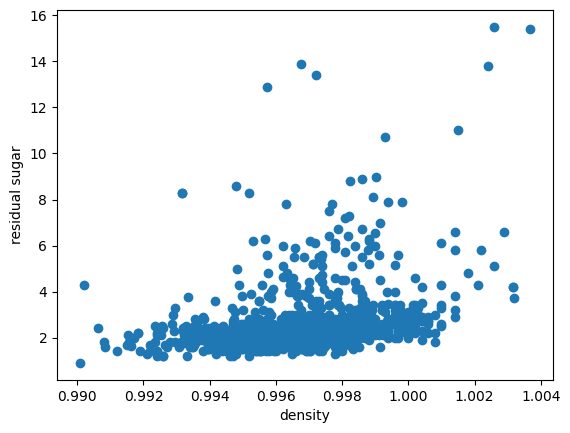

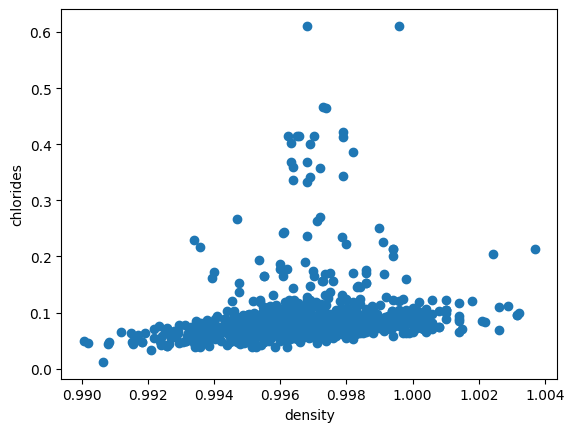

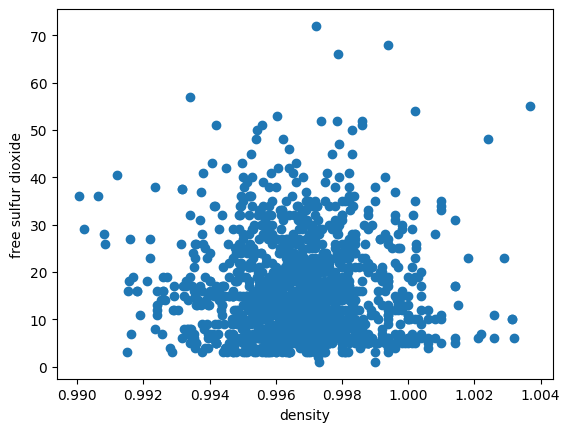

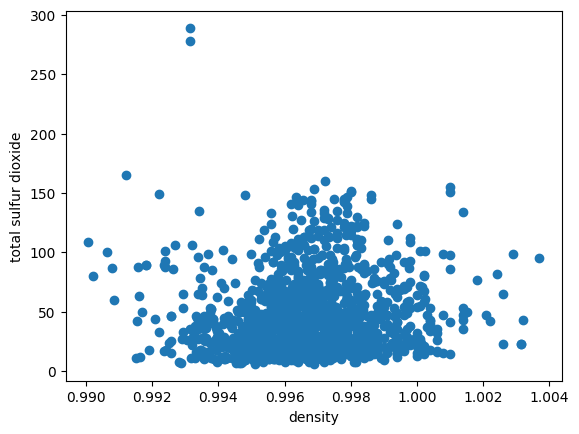

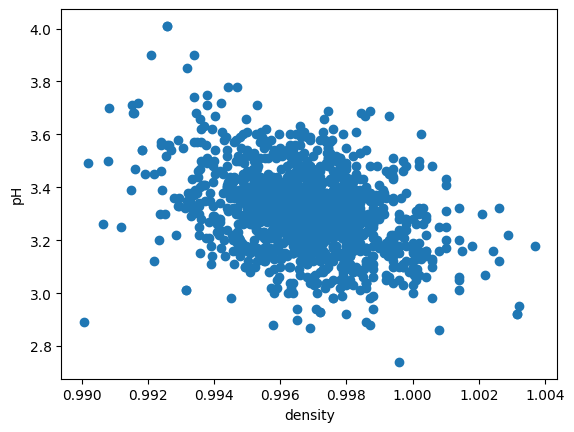

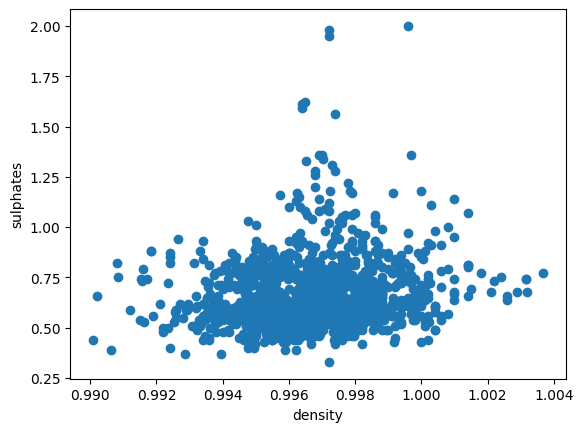

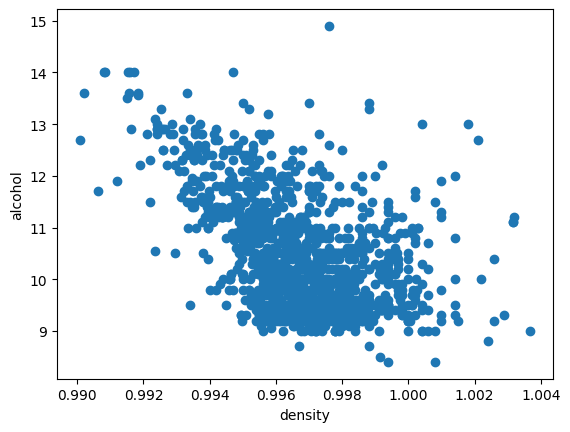

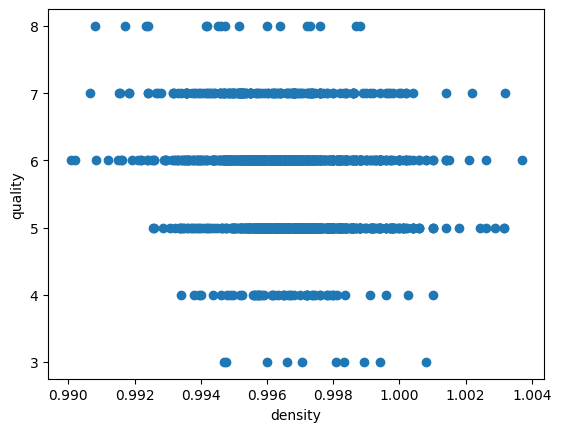

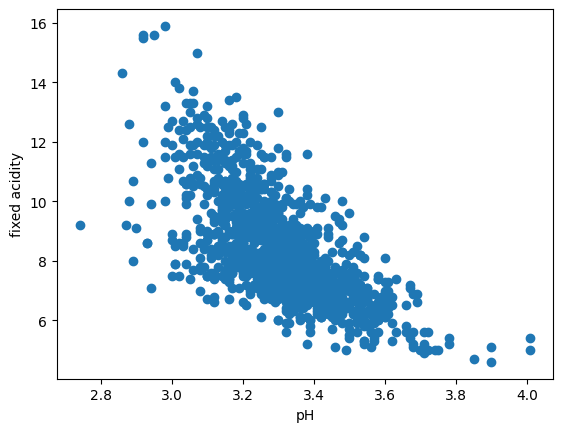

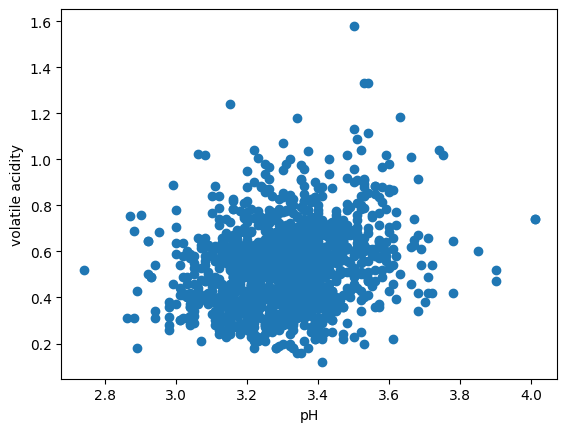

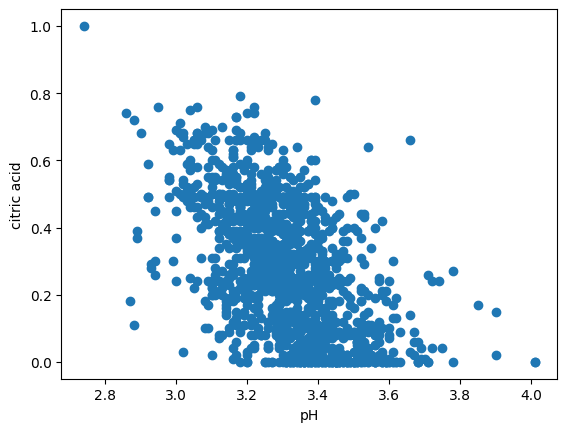

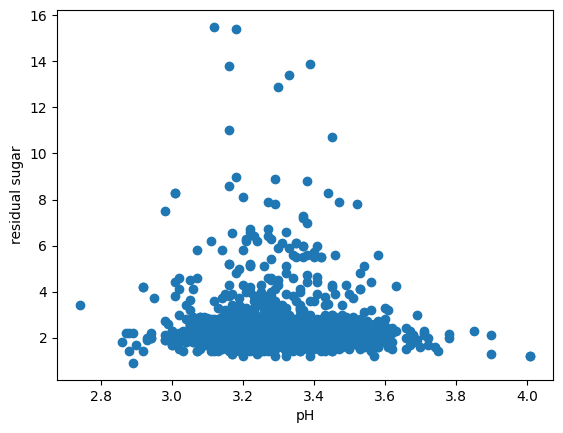

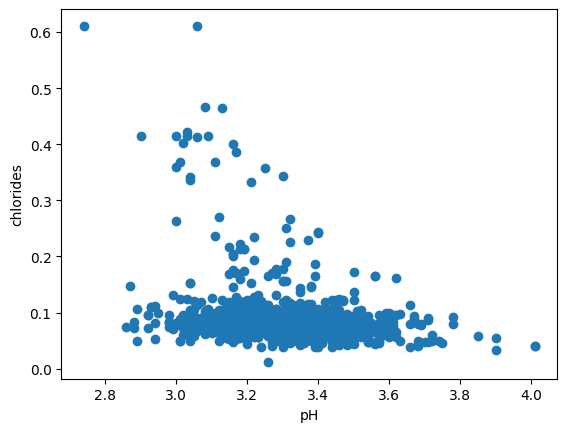

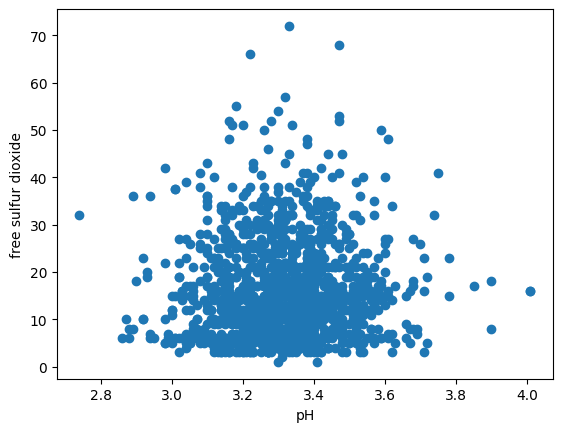

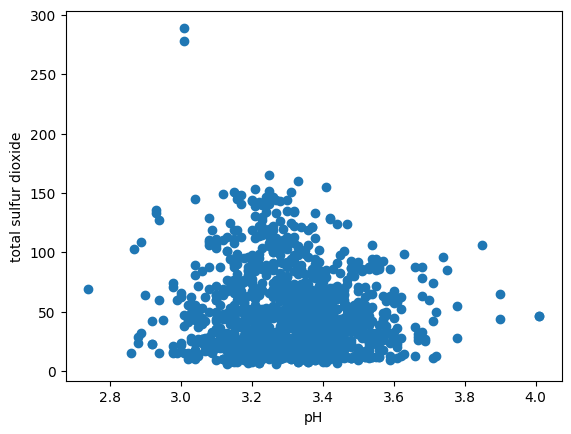

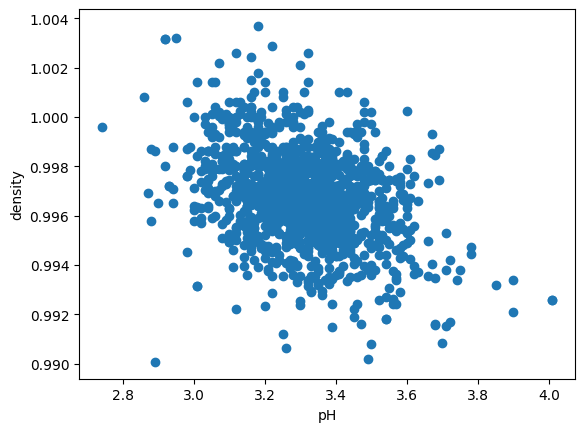

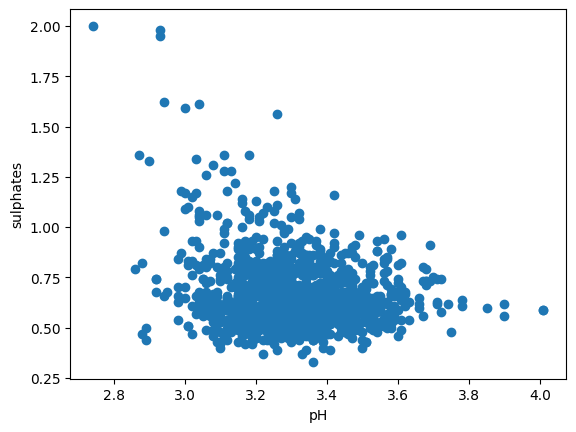

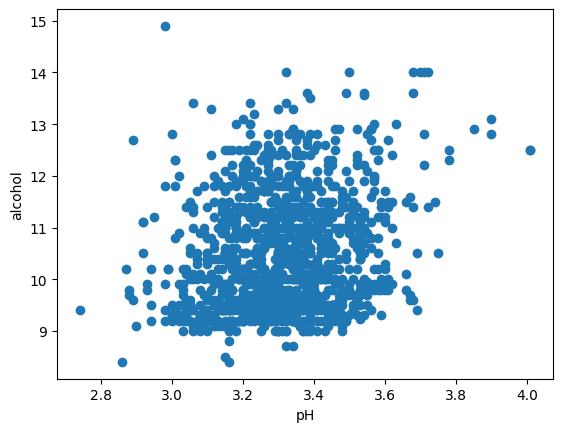

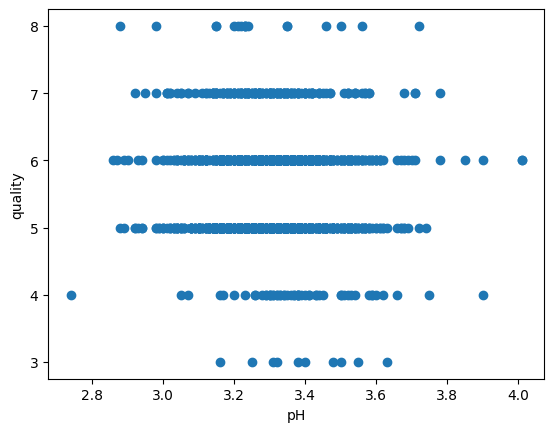

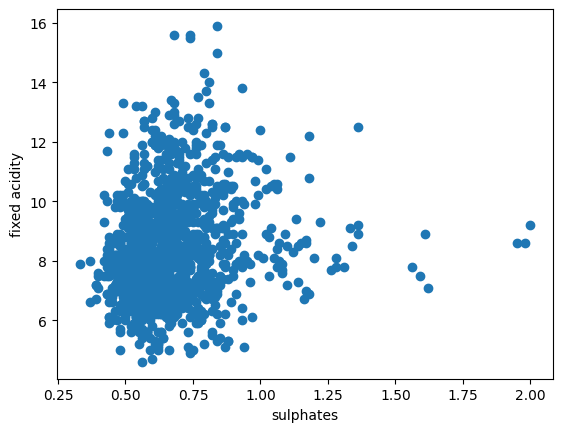

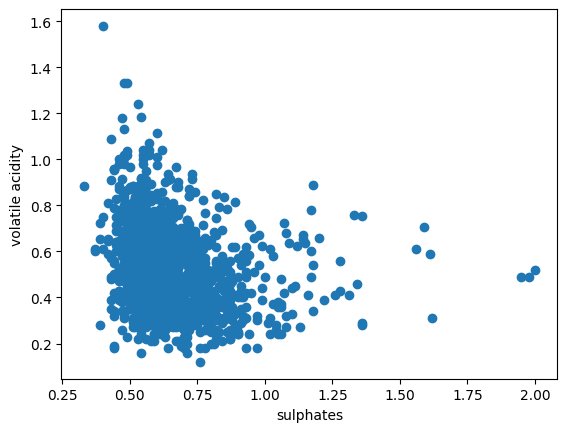

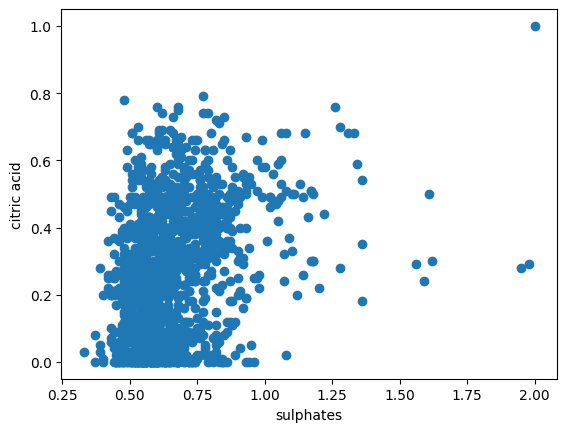

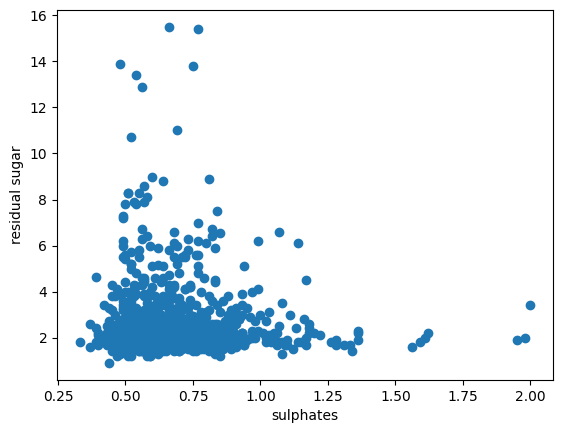

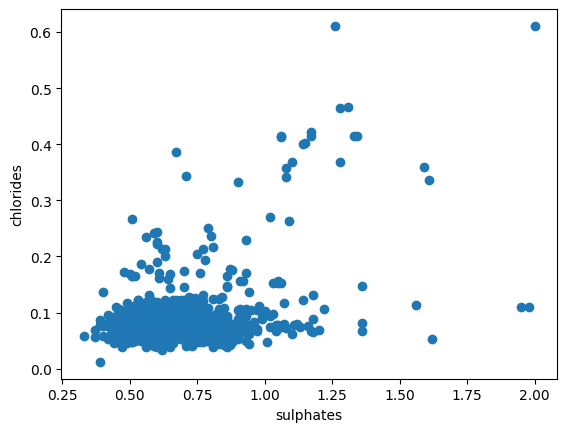

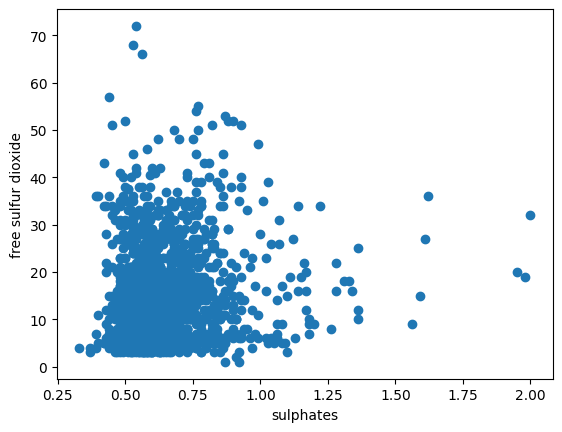

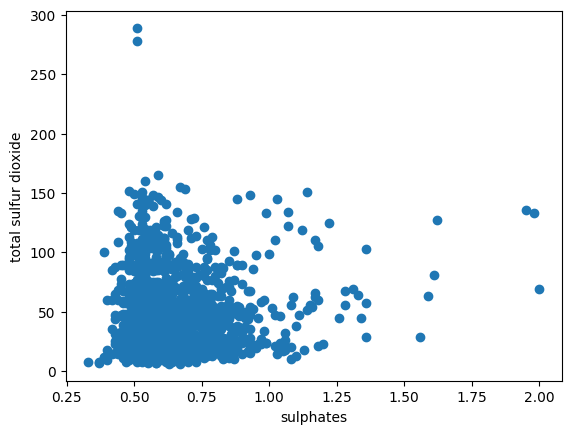

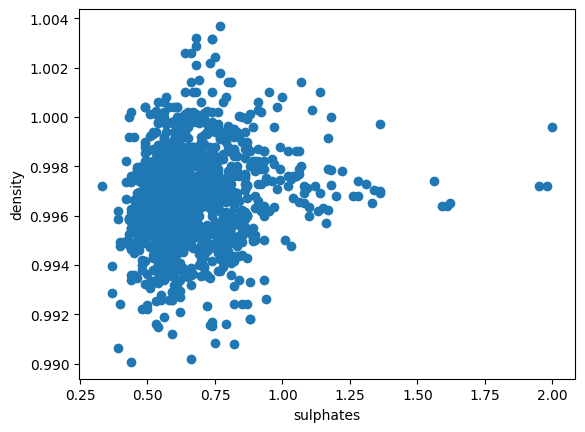

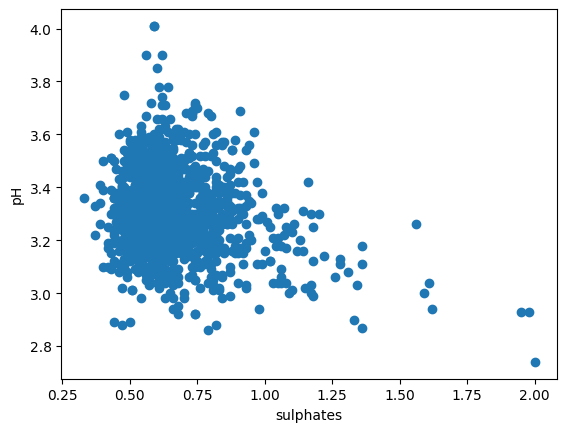

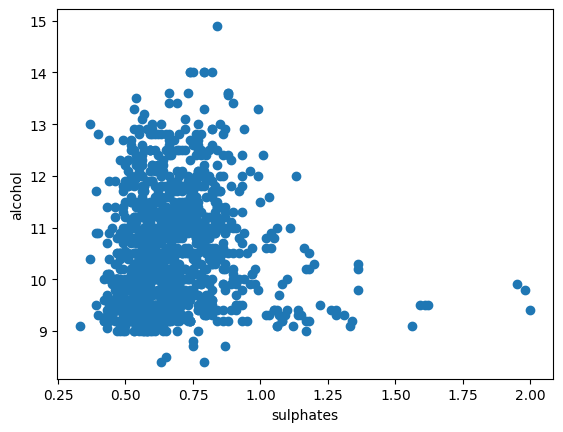

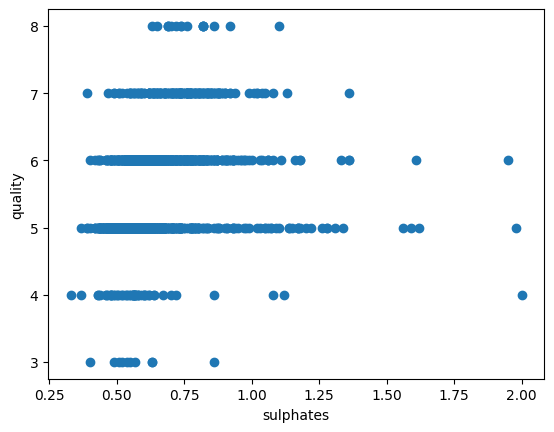

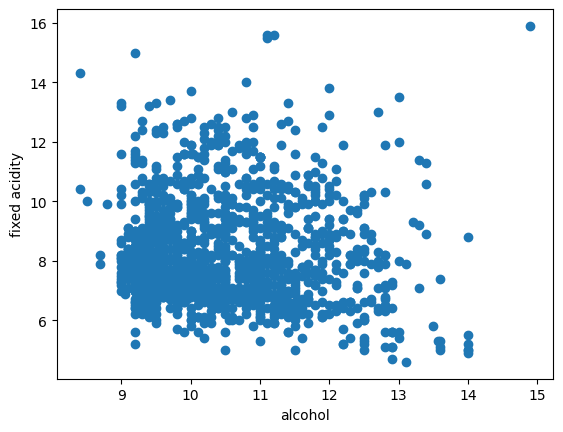

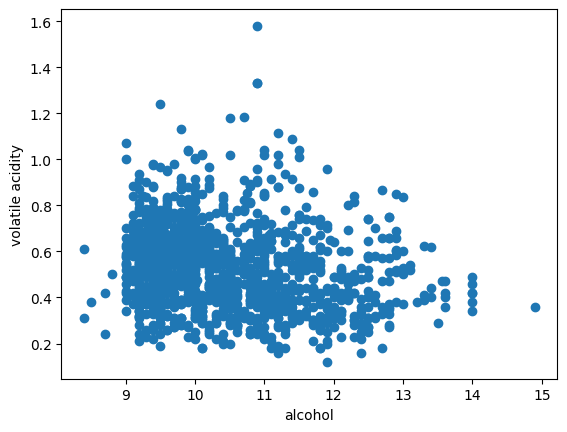

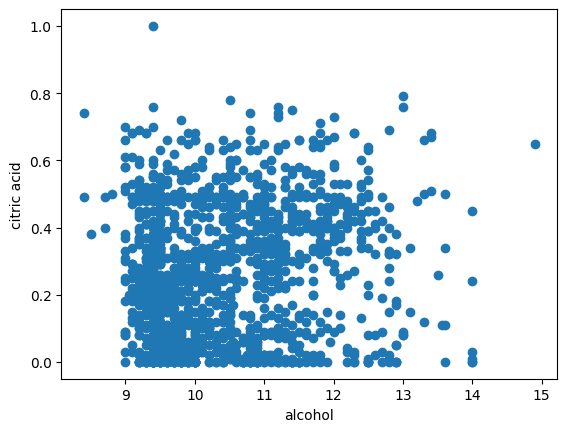

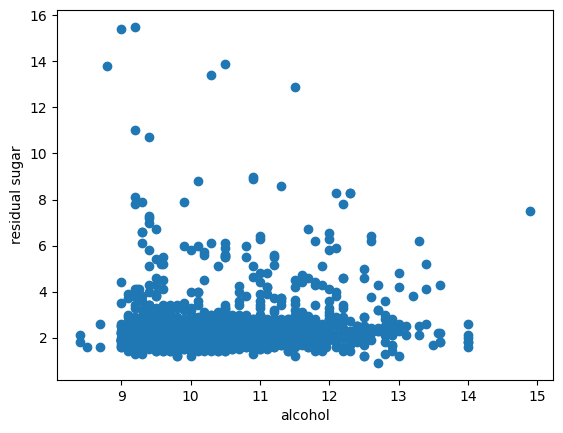

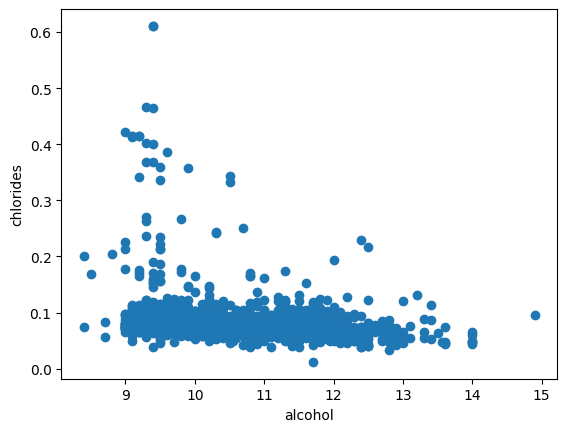

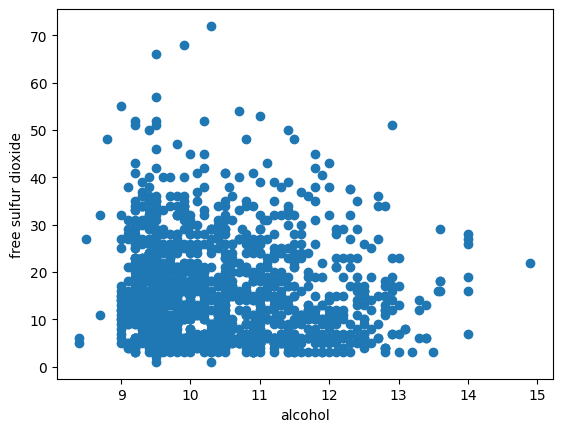

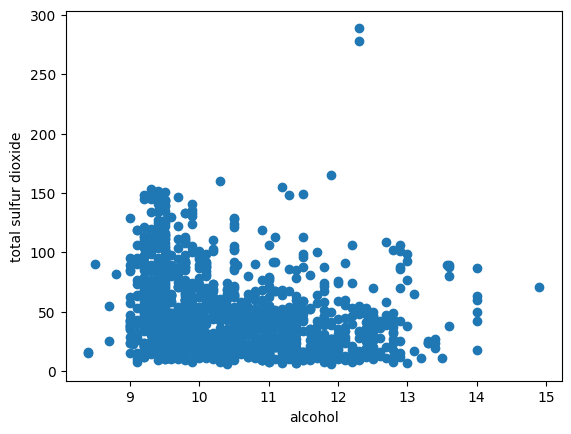

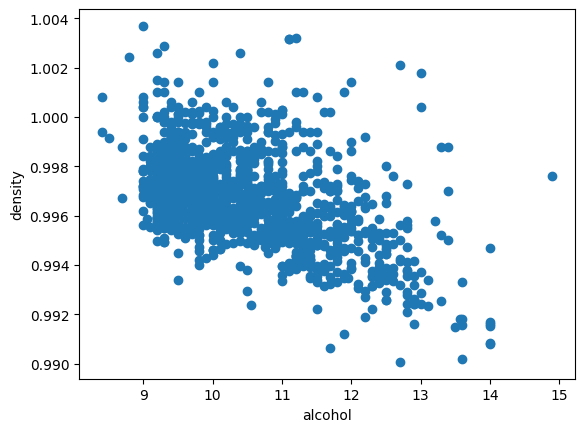

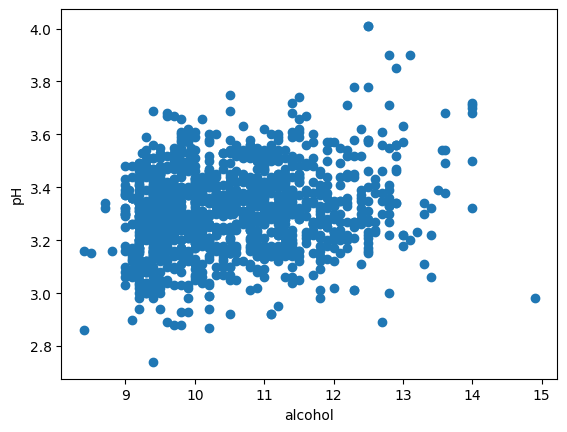

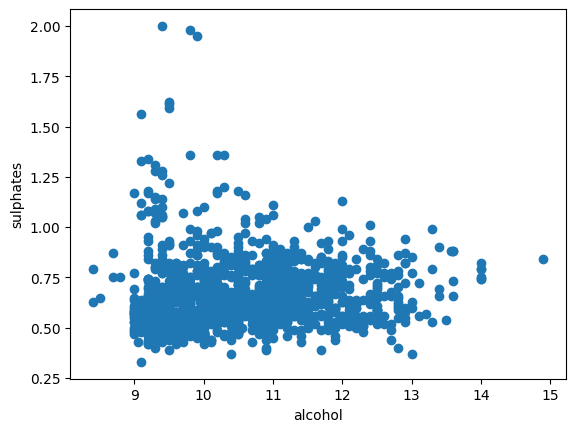

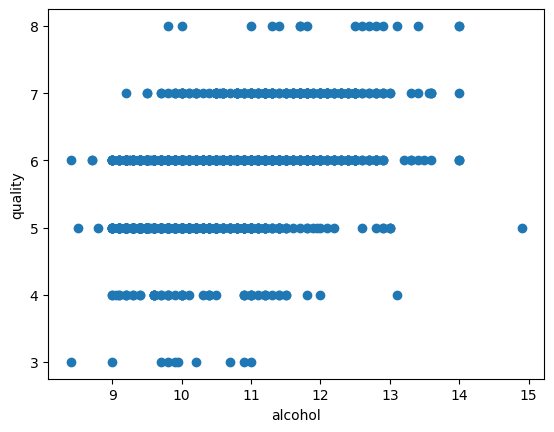

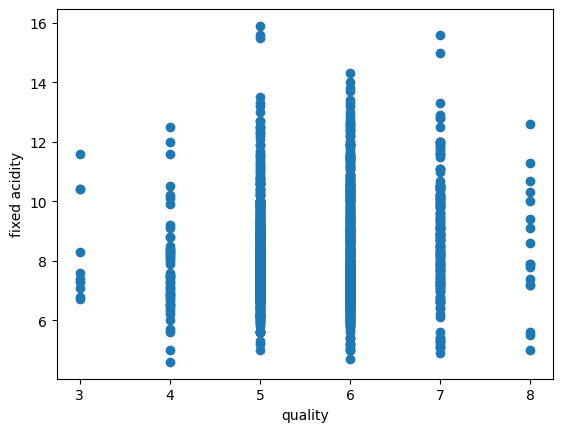

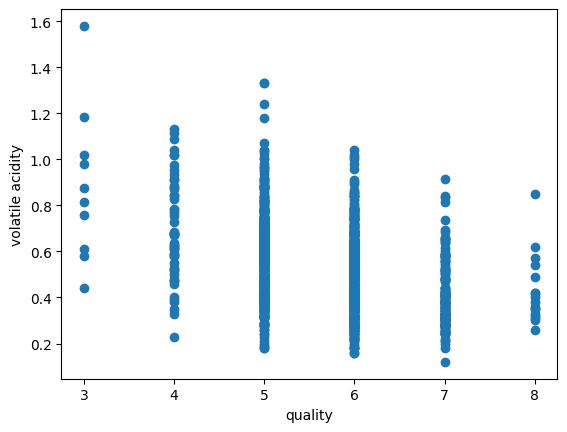

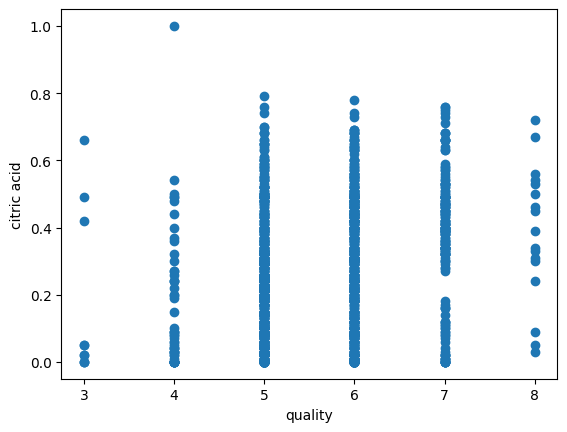

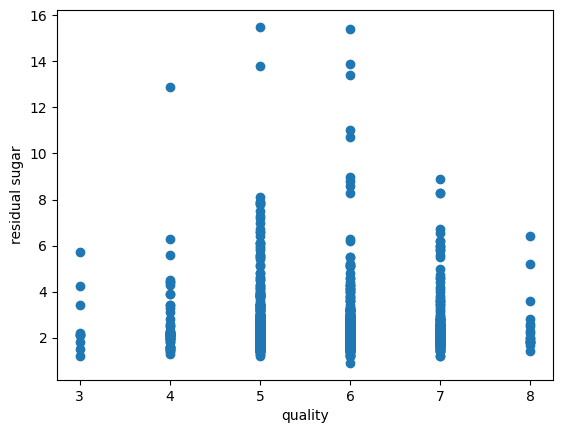

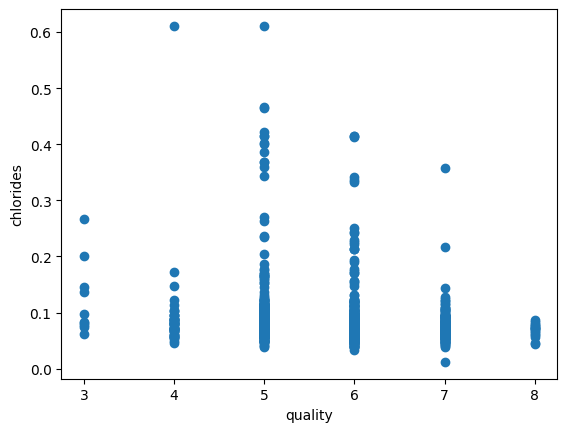

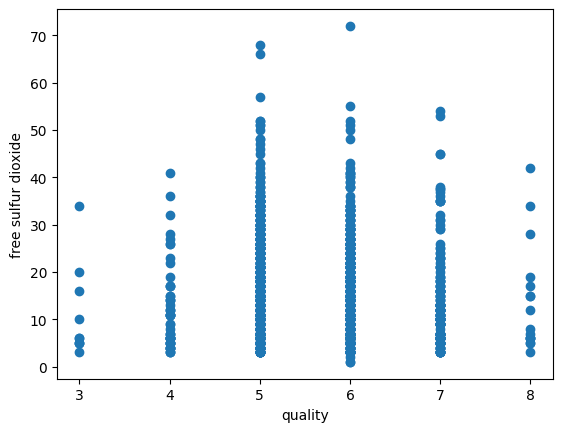

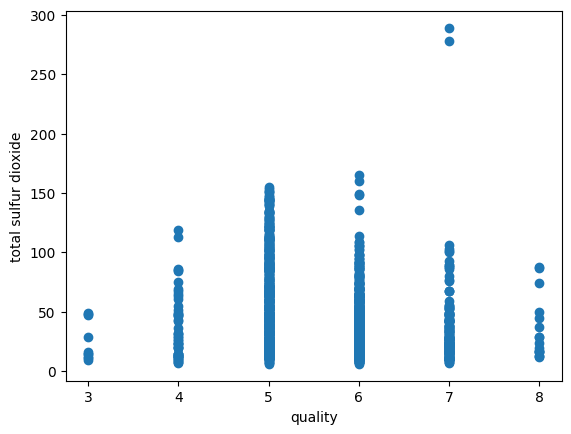

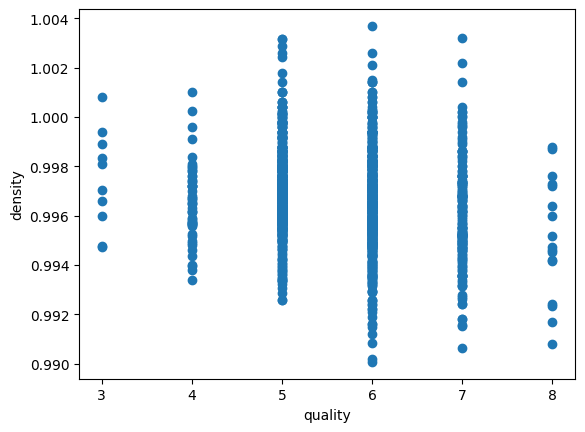

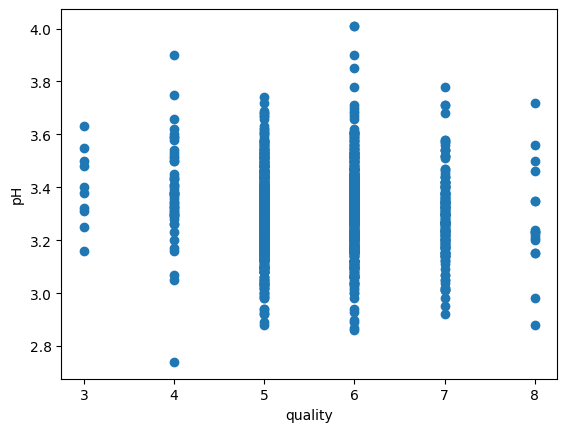

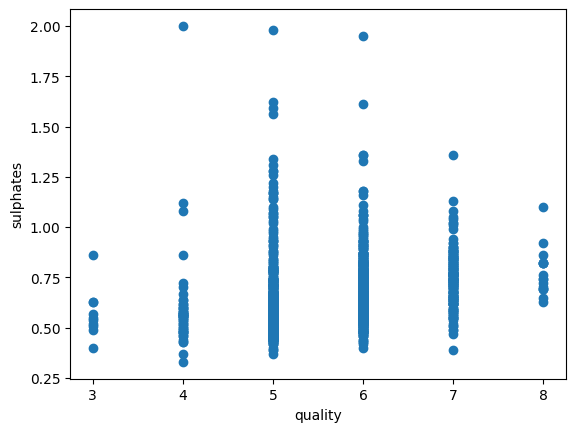

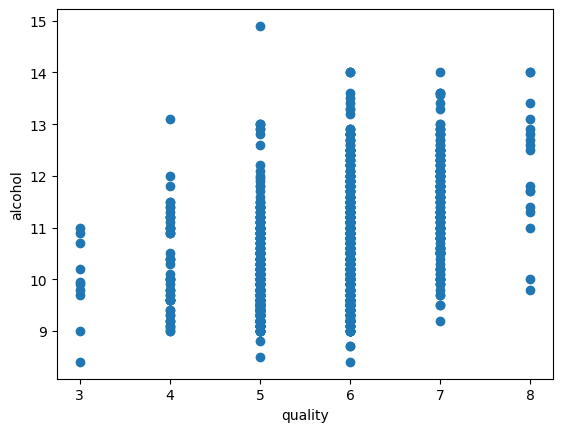

In [565]:
#Loop through different columns
for i in redwine_df.columns:
  for j in redwine_df.columns:
    if i!=j:
      plot_scatter(i,j)

**Scaling the data**

In [566]:
#import Standard scaler and applying
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

**Variance Inflation Factor**

In [567]:
#import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [568]:
#Define vif_scores function to find multicollinearity
def vif_scores(input_data):
  vif_df=pd.DataFrame()
  vif_df['variables']=input_data.columns
  vif_df['VIF']=[variance_inflation_factor(input_data.values,i) for i in range(len(input_data.columns))]
  return vif_df.sort_values(by='VIF',ascending=False)

In [569]:
#print vif_scores
X1_scaled = pd.DataFrame(X_scaled, columns=X.columns)
vif_scores(X1_scaled)

variables       VIF
0          fixed acidity  7.880951
7                density  6.281009
8                     pH  3.397407
10               alcohol  3.140944
2            citric acid  3.124679
6   total sulfur dioxide  2.216688
5    free sulfur dioxide  1.950922
1       volatile acidity  1.777884
3         residual sugar  1.641987
4              chlorides  1.530769
9              sulphates  1.466779

In [570]:
X1_scaled=X1_scaled.drop(['fixed acidity'],axis=1)
vif_scores(X1_scaled)

variables       VIF
1           citric acid  2.750304
6               density  2.381073
9               alcohol  2.183317
5  total sulfur dioxide  2.096564
4   free sulfur dioxide  1.927360
0      volatile acidity  1.769448
7                    pH  1.641887
8             sulphates  1.433426
3             chlorides  1.433036
2        residual sugar  1.352663

In [571]:
X1_scaled.shape

(1359, 10)

**Data Balancing**

In [572]:
#checking number of labels for each class label of Quality
y.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

**Over Sampling Technique**

In [573]:
#Applying SMOTE overSampling technique
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors=4) 
X_res,y_res=oversample.fit_resample(X1_scaled,y)

In [574]:
X_res.shape,y_res.shape

((3462, 10), (3462,))

In [575]:
y.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [576]:
y_res.value_counts()

5    577
6    577
7    577
4    577
8    577
3    577
Name: quality, dtype: int64

<Axes: >

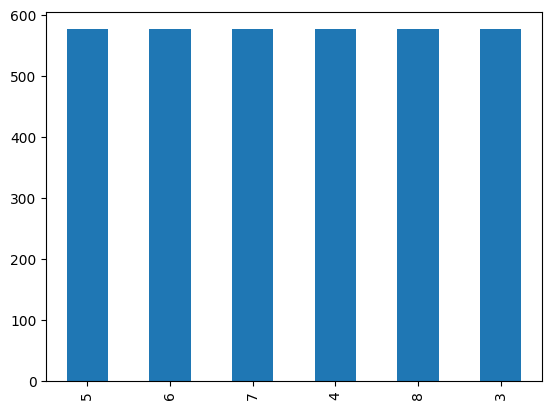

In [577]:
#balanced data
pd.Series(y_res).value_counts().plot.bar()

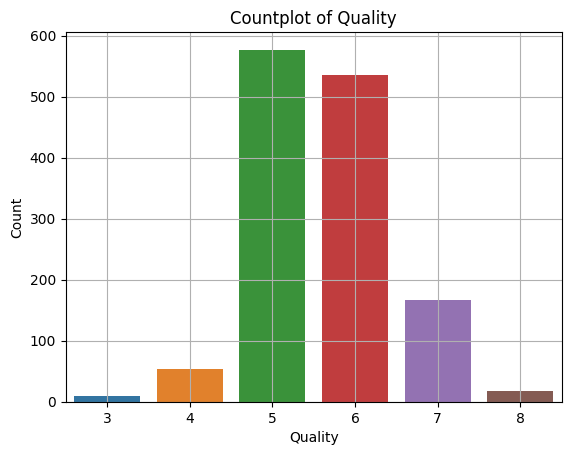

In [578]:
#imbalanced data
sns.countplot(data=redwine_df, x='quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Countplot of Quality')
plt.grid()
plt.show()

**UnderSampling Technique**

In [579]:
#Applying NearMiss UnderSampling Technique
from imblearn.under_sampling import NearMiss
nms=NearMiss()
X_res1,y_res1=nms.fit_resample(X1_scaled,y)

In [580]:
X_res1.shape,y_res1.shape

((60, 10), (60,))

In [581]:
y.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [582]:
y_res1.value_counts()

3    10
4    10
5    10
6    10
7    10
8    10
Name: quality, dtype: int64

**Creating Train and Test datasets using train_test_split**

In [583]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [584]:
#over sampling
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)
#Under sampling
X_train1,X_test1,y_train1,y_test1=train_test_split(X_res1,y_res1,test_size=0.2,random_state=42)

In [585]:
X_train.shape, y_train.shape

((2769, 10), (2769,))

In [586]:
X_train1.shape, y_train1.shape

((48, 10), (48,))

In [587]:
X_test.shape, y_test.shape

((693, 10), (693,))

In [588]:
X_test1.shape, y_test1.shape

((12, 10), (12,))

**Modelling**

In [589]:
#importing necessary libraries for getting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

In [590]:
#Function of caclculating RMSE
def rmse(Xr,yr):
  return math.sqrt((X-y)**2).mean()

In [591]:
#Function of calculating all the relevant metrics
def print_score(m):
  res=[rmse(m.predict(X_train),y_train),rmse(m.predict(X_test),y_test),
       m.score(X_train,y_train),m.score(X_test,y_test),
       median_absolute_error(m.predict(X_train),y_train),
       median_absolute_error(m.predict(X_test),y_test),
       metrics.mean_absolute_error(m.predict(X_train),y_train),
       metrics.mean_absolute_error(m.predict(X_test),y_test)
       ]
  print("RMSE-Train:"+str(res[0])+"\nRMSE-Test:"+str(res[1])+
        "\nScore-Train:"+str(res[2])+"\nScore-Test:"+str(res[3])+
        "\nMedAE-Train:"+str(res[4])+"\nMedAE-Test:"+str(res[5])+
        "\nMeanAE-Train:"+str(res[6])+"\nMeanAE-Train:"+str(res[7]),'\n')


**Decision Tree Classifier**

**Results when Apply Over Sampling Method**

In [592]:
#Importing
from sklearn.tree import DecisionTreeClassifier

#initializing the classifier
dt=DecisionTreeClassifier()

#Fitting the dataset
dt.fit(X_train,y_train)

#Prediction using train data
dt_train_pred=dt.predict(X_train)

#prediction using test data
dt_test_pred=dt.predict(X_test)

In [593]:
#importing confusion_matrix,classification_report,accuracy_score from metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [594]:
print('Train Accuracy when Apply Over sampling:',accuracy_score(y_train,dt_train_pred)*100)

Train Accuracy when Apply Over sampling: 100.0


In [595]:
print('Accuracy Score when Over sampling:',accuracy_score(y_test,dt_test_pred)*100)

Accuracy Score when Over sampling: 73.59307359307358


In [596]:
#confusion matrix Apply over sampling
print("Apply Over Sampling\n",confusion_matrix(y_test,dt_test_pred))

Apply Over Sampling
 [[115   1   2   3   1   0]
 [  1  85   6   4   2   0]
 [  5  11  59  45   7   1]
 [  2   7  26  54  21   5]
 [  0   2   2  15  96   5]
 [  0   0   0   3   6 101]]


In [597]:
#Classification Report Apply over sampling
print("Apply Over Sampling\n",classification_report(y_test,dt_test_pred,digits=4))

Apply Over Sampling
               precision    recall  f1-score   support

           3     0.9350    0.9426    0.9388       122
           4     0.8019    0.8673    0.8333        98
           5     0.6211    0.4609    0.5291       128
           6     0.4355    0.4696    0.4519       115
           7     0.7218    0.8000    0.7589       120
           8     0.9018    0.9182    0.9099       110

    accuracy                         0.7359       693
   macro avg     0.7362    0.7431    0.7370       693
weighted avg     0.7331    0.7359    0.7317       693



**Results when apply Under Sampling Method**

In [598]:
dt.fit(X_train1,y_train1)
dt_train_pred1=dt.predict(X_train1)
dt_test_pred1=dt.predict(X_test1)

In [599]:
print('Train Accuracy when Apply under sampling:',accuracy_score(y_train1,dt_train_pred1)*100)

Train Accuracy when Apply under sampling: 100.0


In [600]:
print('Accuracy Score when Under sampling:',accuracy_score(y_test1,dt_test_pred1)*100)

Accuracy Score when Under sampling: 58.333333333333336


In [601]:
#confusion matrix Apply over sampling
print("Apply Over Sampling\n",confusion_matrix(y_test1,dt_test_pred1))

Apply Over Sampling
 [[1 0 0 0 1 0]
 [1 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 1 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 3]]


In [602]:
#Classification Report Apply over sampling
print("Apply under Sampling\n",classification_report(y_test1,dt_test_pred1,digits=4))

Apply under Sampling
               precision    recall  f1-score   support

           3     0.5000    0.5000    0.5000         2
           4     0.0000    0.0000    0.0000         2
           5     0.0000    0.0000    0.0000         0
           6     0.0000    0.0000    0.0000         2
           7     0.6000    1.0000    0.7500         3
           8     1.0000    1.0000    1.0000         3

    accuracy                         0.5833        12
   macro avg     0.3500    0.4167    0.3750        12
weighted avg     0.4833    0.5833    0.5208        12



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

**Random Forest classifier**

**Over Sampling**

In [603]:
#Importing
from sklearn.ensemble import RandomForestClassifier

#initializing the classifier
RFC=RandomForestClassifier()

#Fitting the dataset
RFC.fit(X_train,y_train)

#Prediction using train data
RFC_train_pred=RFC.predict(X_train)

#Prediction using test data
RFC_test_pred=RFC.predict(X_test)

In [604]:
print('Train Accuracy:',accuracy_score(y_train,RFC_train_pred)*100)

Train Accuracy: 100.0


In [605]:
print('Accuracy Score:',accuracy_score(y_test,RFC_test_pred)*100)

Accuracy Score: 84.84848484848484


In [606]:
#confusion matrix Apply over sampling
print("Apply Over Sampling\n",confusion_matrix(y_test,RFC_test_pred))

Apply Over Sampling
 [[122   0   0   0   0   0]
 [  0  97   1   0   0   0]
 [  4   9  84  29   1   1]
 [  0   6  28  64  11   6]
 [  0   1   0   6 111   2]
 [  0   0   0   0   0 110]]


In [607]:
#Classification Report Apply over sampling
print("Apply Over Sampling\n",classification_report(y_test,RFC_test_pred,digits=4))

Apply Over Sampling
               precision    recall  f1-score   support

           3     0.9683    1.0000    0.9839       122
           4     0.8584    0.9898    0.9194        98
           5     0.7434    0.6562    0.6971       128
           6     0.6465    0.5565    0.5981       115
           7     0.9024    0.9250    0.9136       120
           8     0.9244    1.0000    0.9607       110

    accuracy                         0.8485       693
   macro avg     0.8405    0.8546    0.8455       693
weighted avg     0.8394    0.8485    0.8419       693



**Under Sampling**

In [608]:
RFC.fit(X_train1,y_train1)
RFC_train_pred1=RFC.predict(X_train1)
RFC_test_pred1=RFC.predict(X_test1)

In [609]:
print('Train Accuracy:',accuracy_score(y_train1,RFC_train_pred1)*100)

Train Accuracy: 100.0


In [610]:
print('Accuracy Score:',accuracy_score(y_test1,RFC_test_pred1)*100)

Accuracy Score: 58.333333333333336


In [611]:
#confusion matrix Apply over sampling
print("Apply Under Sampling\n",confusion_matrix(y_test1,RFC_test_pred1))

Apply Under Sampling
 [[1 0 0 1 0]
 [0 1 1 0 0]
 [0 0 1 1 0]
 [0 0 2 1 0]
 [0 0 0 0 3]]


In [612]:
#Classification Report Apply over sampling
print("Apply Under Sampling\n",classification_report(y_test1,RFC_test_pred1,digits=4))

Apply Under Sampling
               precision    recall  f1-score   support

           3     1.0000    0.5000    0.6667         2
           4     1.0000    0.5000    0.6667         2
           6     0.2500    0.5000    0.3333         2
           7     0.3333    0.3333    0.3333         3
           8     1.0000    1.0000    1.0000         3

    accuracy                         0.5833        12
   macro avg     0.7167    0.5667    0.6000        12
weighted avg     0.7083    0.5833    0.6111        12



**SVC**

**Over Sampling**

In [613]:
#importing SVC
from sklearn.svm import SVC

In [614]:

#initializing the classifier
svc=SVC(probability=True)

#Fitting the dataset
svc.fit(X_train,y_train)

SVC(probability=True)

In [615]:
#Prediction using train data
svc_train_pred=svc.predict(X_train)

#Prediction using test data
svc_test_pred=svc.predict(X_test)

In [616]:
print('Train Accuracy:',accuracy_score(y_train,svc_train_pred)*100)

Train Accuracy: 78.83712531599856


In [617]:
print('Accuracy Score:',accuracy_score(y_test,svc_test_pred)*100)

Accuracy Score: 74.31457431457432


In [618]:
#confusion matrix Apply over sampling
print("Apply Over Sampling\n",confusion_matrix(y_test,svc_test_pred))

Apply Over Sampling
 [[122   0   0   0   0   0]
 [  5  86   4   3   0   0]
 [  8  19  73  24   3   1]
 [  3  12  29  48  19   4]
 [  2   0   5  22  78  13]
 [  0   0   0   0   2 108]]


In [619]:
#Classification Report Apply over sampling
print("Apply Over Sampling\n",classification_report(y_test,svc_test_pred,digits=4))

Apply Over Sampling
               precision    recall  f1-score   support

           3     0.8714    1.0000    0.9313       122
           4     0.7350    0.8776    0.8000        98
           5     0.6577    0.5703    0.6109       128
           6     0.4948    0.4174    0.4528       115
           7     0.7647    0.6500    0.7027       120
           8     0.8571    0.9818    0.9153       110

    accuracy                         0.7431       693
   macro avg     0.7301    0.7495    0.7355       693
weighted avg     0.7294    0.7431    0.7320       693



**Under Sampling**

In [620]:
svc.fit(X_train1,y_train1)
svc_train_pred1=svc.predict(X_train1)
svc_test_pred1=svc.predict(X_test1)

In [621]:
print('Train Accuracy:',accuracy_score(y_train1,svc_train_pred1)*100)

Train Accuracy: 66.66666666666666


In [622]:
print('Accuracy Score:',accuracy_score(y_test1,svc_test_pred1)*100)

Accuracy Score: 50.0


In [623]:
#confusion matrix Apply over sampling
print("Apply under Sampling\n",confusion_matrix(y_test1,svc_test_pred1))

Apply under Sampling
 [[2 0 0 0 0 0]
 [1 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 1 1 0 0]
 [0 0 0 2 1 0]
 [1 0 0 0 0 2]]


In [624]:
#Classification Report Apply over sampling
print("Apply Under Sampling\n",classification_report(y_test1,svc_test_pred1,digits=4))

Apply Under Sampling
               precision    recall  f1-score   support

           3     0.5000    1.0000    0.6667         2
           4     0.0000    0.0000    0.0000         2
           5     0.0000    0.0000    0.0000         0
           6     0.2500    0.5000    0.3333         2
           7     1.0000    0.3333    0.5000         3
           8     1.0000    0.6667    0.8000         3

    accuracy                         0.5000        12
   macro avg     0.4583    0.4167    0.3833        12
weighted avg     0.6250    0.5000    0.4917        12



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

**Hyper Parameter Tuning for Decsiion tree classifier**

In [625]:

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 10,15,20,25],
    'min_samples_split': [2, 10,15,20,25],
    'min_samples_leaf': [2, 10,15,20,25]
}

# Create an instance of the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create an instance of RandomizedSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, verbose=1, cv=5)

# Fit the RandomizedSearchCV instance to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Fitting 5 folds for each of 250 candidates, totalling 1250 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.7334773894934751


**using the best paramaters and training the decison tree Classifier**

In [626]:
dtc=DecisionTreeClassifier(**{'min_samples_split': 2 ,'min_samples_leaf': 2, 'max_depth': 15, 'criterion': 'entropy'})
dtc.fit(X_train,y_train)
dtc_train_pred=dtc.predict(X_train)
dtc_test_pred=dtc.predict(X_test)
print('Train Accuracy when Apply Over sampling:',accuracy_score(y_train,dtc_train_pred)*100)
print('Accuracy Score when Over sampling:',accuracy_score(y_test,dtc_test_pred)*100)
#confusion matrix Apply over sampling
print("Apply Over Sampling\n",confusion_matrix(y_test,dtc_test_pred))
#Classification Report Apply over sampling
print("Apply Over Sampling\n",classification_report(y_test,dtc_test_pred,digits=4))

Train Accuracy when Apply Over sampling: 95.84687612856627
Accuracy Score when Over sampling: 72.87157287157288
Apply Over Sampling
 [[111   0   8   3   0   0]
 [  1  89   1   6   1   0]
 [  5  22  61  34   5   1]
 [  1   8  33  48  19   6]
 [  0   2  10  13  92   3]
 [  0   0   0   2   4 104]]
Apply Over Sampling
               precision    recall  f1-score   support

           3     0.9407    0.9098    0.9250       122
           4     0.7355    0.9082    0.8128        98
           5     0.5398    0.4766    0.5062       128
           6     0.4528    0.4174    0.4344       115
           7     0.7603    0.7667    0.7635       120
           8     0.9123    0.9455    0.9286       110

    accuracy                         0.7287       693
   macro avg     0.7236    0.7373    0.7284       693
weighted avg     0.7209    0.7287    0.7230       693



**Hyper Parameter tuning for SVC**

In [627]:
param_grid={
    'C':[0.1,1,10],
    'gamma':[1,0.1,0.01],
    'kernel':['rbf']
}

In [628]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=5)

In [629]:
svc=SVC(random_state=1)
svc_search=GridSearchCV(estimator=svc,param_grid=param_grid,cv=5,verbose=5,n_jobs=-1)

In [630]:
svc_search.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVC(random_state=1), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=5)

In [631]:
print(svc_search.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [632]:
svc_hp=SVC(C=10,gamma=1,kernel='rbf',probability=True,random_state=42)
svc_hp.fit(X_train,y_train)

SVC(C=10, gamma=1, probability=True, random_state=42)

In [633]:

svc_hp_train_pred=svc_hp.predict(X_train)
svc_hp_test_pred=svc_hp.predict(X_test)
print('Train Accuracy:',accuracy_score(y_train,svc_hp_train_pred)*100)
print('Accuracy Score:',accuracy_score(y_test,svc_hp_test_pred)*100)
#confusion matrix Apply over sampling
print("Apply Over Sampling\n",confusion_matrix(y_test,svc_hp_test_pred))
#Classification Report Apply over sampling
print("Apply Over Sampling\n",classification_report(y_test,svc_hp_test_pred,digits=4))

Train Accuracy: 99.89165763813651
Accuracy Score: 83.98268398268398
Apply Over Sampling
 [[122   0   0   0   0   0]
 [  0  98   0   0   0   0]
 [  0   4  84  36   4   0]
 [  0   3  45  63   4   0]
 [  0   0   4   6 106   4]
 [  0   0   0   0   1 109]]
Apply Over Sampling
               precision    recall  f1-score   support

           3     1.0000    1.0000    1.0000       122
           4     0.9333    1.0000    0.9655        98
           5     0.6316    0.6562    0.6437       128
           6     0.6000    0.5478    0.5727       115
           7     0.9217    0.8833    0.9021       120
           8     0.9646    0.9909    0.9776       110

    accuracy                         0.8398       693
   macro avg     0.8419    0.8464    0.8436       693
weighted avg     0.8370    0.8398    0.8379       693



**Random Forest Regressor Using Hyper Parameter tuning**

In [634]:
param_grid={
    'max_depth':[2,4,8,10],
    'min_samples_leaf':range(2,20,10),
    'min_samples_split':range(2,20,10),
}

In [635]:
RF=RandomForestClassifier(random_state=1)

In [636]:
rs=RandomizedSearchCV(RF,param_grid,random_state=1)
rs.fit(X_train,y_train)


RandomizedSearchCV(estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'max_depth': [2, 4, 8, 10],
                                        'min_samples_leaf': range(2, 20, 10),
                                        'min_samples_split': range(2, 20, 10)},
                   random_state=1)

In [637]:

print(rs.best_params_)
print(rs.best_score_)

{'min_samples_split': 12, 'min_samples_leaf': 2, 'max_depth': 10}
0.7973952383128455


In [638]:
RFC_hp=RandomForestClassifier(max_depth=10,min_samples_leaf=2,min_samples_split=12,random_state=42)

RFC_hp.fit(X_train,y_train)
RFC_hp_train_pred=RFC_hp.predict(X_train)
RFC_hp_test_pred=RFC_hp.predict(X_test)

print('Train Accuracy:',accuracy_score(y_train,RFC_hp_train_pred)*100)

print('Accuracy Score:',accuracy_score(y_test,RFC_hp_test_pred)*100)

#confusion matrix Apply over sampling
print("Apply Over Sampling\n",confusion_matrix(y_test,RFC_hp_test_pred))

#Classification Report Apply over sampling
print("Apply Over Sampling\n",classification_report(y_test,RFC_hp_test_pred,digits=4))

Train Accuracy: 93.17443120260022
Accuracy Score: 81.81818181818183
Apply Over Sampling
 [[119   2   1   0   0   0]
 [  1  97   0   0   0   0]
 [  4  14  84  23   2   1]
 [  1   8  29  57  14   6]
 [  0   0   5  10 100   5]
 [  0   0   0   0   0 110]]
Apply Over Sampling
               precision    recall  f1-score   support

           3     0.9520    0.9754    0.9636       122
           4     0.8017    0.9898    0.8858        98
           5     0.7059    0.6562    0.6802       128
           6     0.6333    0.4957    0.5561       115
           7     0.8621    0.8333    0.8475       120
           8     0.9016    1.0000    0.9483       110

    accuracy                         0.8182       693
   macro avg     0.8094    0.8251    0.8136       693
weighted avg     0.8088    0.8182    0.8101       693



**KNeighborsClassifier when using Over sampling**

In [639]:
#importing
from sklearn.neighbors import KNeighborsClassifier

#initilaizing the classifier
knn = KNeighborsClassifier()

#fitting the data
knn.fit(X_train, y_train)

#Prediction using test data
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7777777777777778


**Hyper Paramater tuning for Kneighbors Classifier**

In [648]:

# Define the parameter grid
param_grid = {
    'n_neighbors': [2,3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],
    'p': [1, 2,3]  # Distance metric (1: Manhattan distance, 2: Euclidean distance)
}

# Create an instance of the KNN classifier
knn1 = KNeighborsClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(knn1, param_grid, cv=5)

# Fit the GridSearchCV instance to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Best Parameters: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Best Score: 0.8317062821107056


In [657]:
# Create an instance of the KNN classifier
knn2 = KNeighborsClassifier()

# Set the best parameters
best_params = {'n_neighbors': 2, 'weights': 'distance', 'p': 1}
knn2.set_params(**best_params)

# Fit the model to the training data
knn2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8124098124098124
[[122   0   0   0   0   0]
 [  1  97   0   0   0   0]
 [  1  10  68  43   5   1]
 [  0   8  29  53  19   6]
 [  0   0   2   3 113   2]
 [  0   0   0   0   0 110]]
              precision    recall  f1-score   support

           3       0.98      1.00      0.99       122
           4       0.84      0.99      0.91        98
           5       0.69      0.53      0.60       128
           6       0.54      0.46      0.50       115
           7       0.82      0.94      0.88       120
           8       0.92      1.00      0.96       110

    accuracy                           0.81       693
   macro avg       0.80      0.82      0.81       693
weighted avg       0.80      0.81      0.80       693

